Se tienen $n$ máquinas que deben estar en funcionamiento y $s$ máquinas de repuesto que reemplazan las rotas en el momento que se rompen. Las maquinas rotas tienen un tiempo de reparación que se determina por alguna distribución $G$ y el tiempo de vida de las máquinas se determina por una distribución $F$.

Al romperse una máquina tiene un costo de reparación $c$ y un tiempo de reparación $r$, se puede elegir repararla o comprar una nueva en cuyos casos:

- Si se repara la máquina volverá a estar disponible en el tiempo $r$ habiendo consumido un costo $c$ 
- Si no se repara, se compra una nueva por un costo fijo $C$ y demora un tiempo fijo $R$ en llegar y estar disponible

La fábrica genera dinero continuamente mientras está en funcionamiento a un ritmo $p(t) > 0$ (la fábrica no tiene pérdidas) donde $t$ es el tiempo transcurrido y $p$ una función que define la ganancia. Con esto se dice que la ganancia hasta el momento $t^{*}$ es igual a $P(t^{*}) = \int_{0}^{t^{*}} {p(t)dt}$. En el código $P$ es referida como `profit_function`.

Además, al inicio tiene un presupuesto inicial $f > 0$ al cual se le suman todas las ganancias obtenidas (reinversión total) en todo momento, si en algún momento $f <= 0$, la fábrica quiebra y por lo tanto se detiene la simulación. 

Para decidir si una máquina será reparada o desechada se usa una función $D(c, r, C, R, f) \in \{0, 1\}$ donde $0$ representa que se repara y $1$ que se desecha. Esta función en el código se llama `decition_function`.

Una unidad te tiempo se considera equivalente a un dia de la vida real, una unidad de dinero se considera equivalente a 1000 dólares de la vida real para tener referencias.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import weibull_min

from src.simulate import *
from src.profit_functions import *
from src.decition_functions import *

In [26]:
event_distribution       = lambda : weibull_min.rvs(2, scale=1) # En promedio una maquina demora 1 dia en romperse
repair_time_distribution = lambda : weibull_min.rvs(2, scale=1) # En promedio una reparacion demora 1 semana en completarse
repair_cost_distribution = lambda : weibull_min.rvs(1, scale=1) # Una maquina tiene un costo promedio de 3000 dolares para repararse

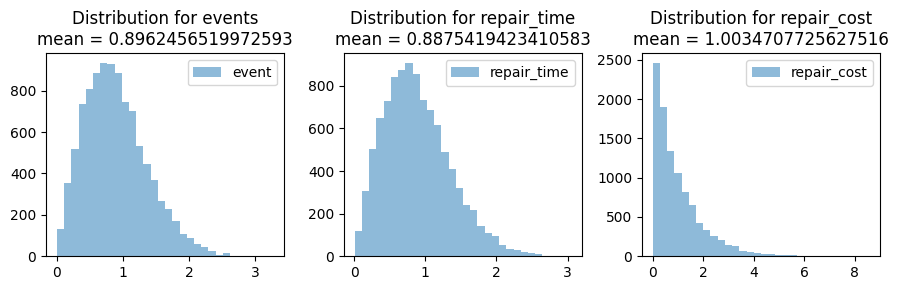

In [27]:
event = np.array([event_distribution() for _ in range(10000)])
repair_time = np.array([repair_time_distribution() for _ in range(10000)])
repair_cost = np.array([repair_cost_distribution() for _ in range(10000)])

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs = axs.flatten()

axs[0].hist(event, bins=30, alpha=0.5, label='event')
axs[0].set_title(f'Distribution for events\nmean = {event.mean()}')
axs[0].legend()

axs[1].hist(repair_time, bins=30, alpha=0.5, label='repair_time')
axs[1].set_title(f'Distribution for repair_time\nmean = {repair_time.mean()}')
axs[1].legend()

axs[2].hist(repair_cost, bins=30, alpha=0.5, label='repair_cost')
axs[2].set_title(f'Distribution for repair_cost\nmean = {repair_cost.mean()}')
axs[2].legend()

for i in range(10, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

## Experimentos


### 1 - Experimento original propuesto en el libro

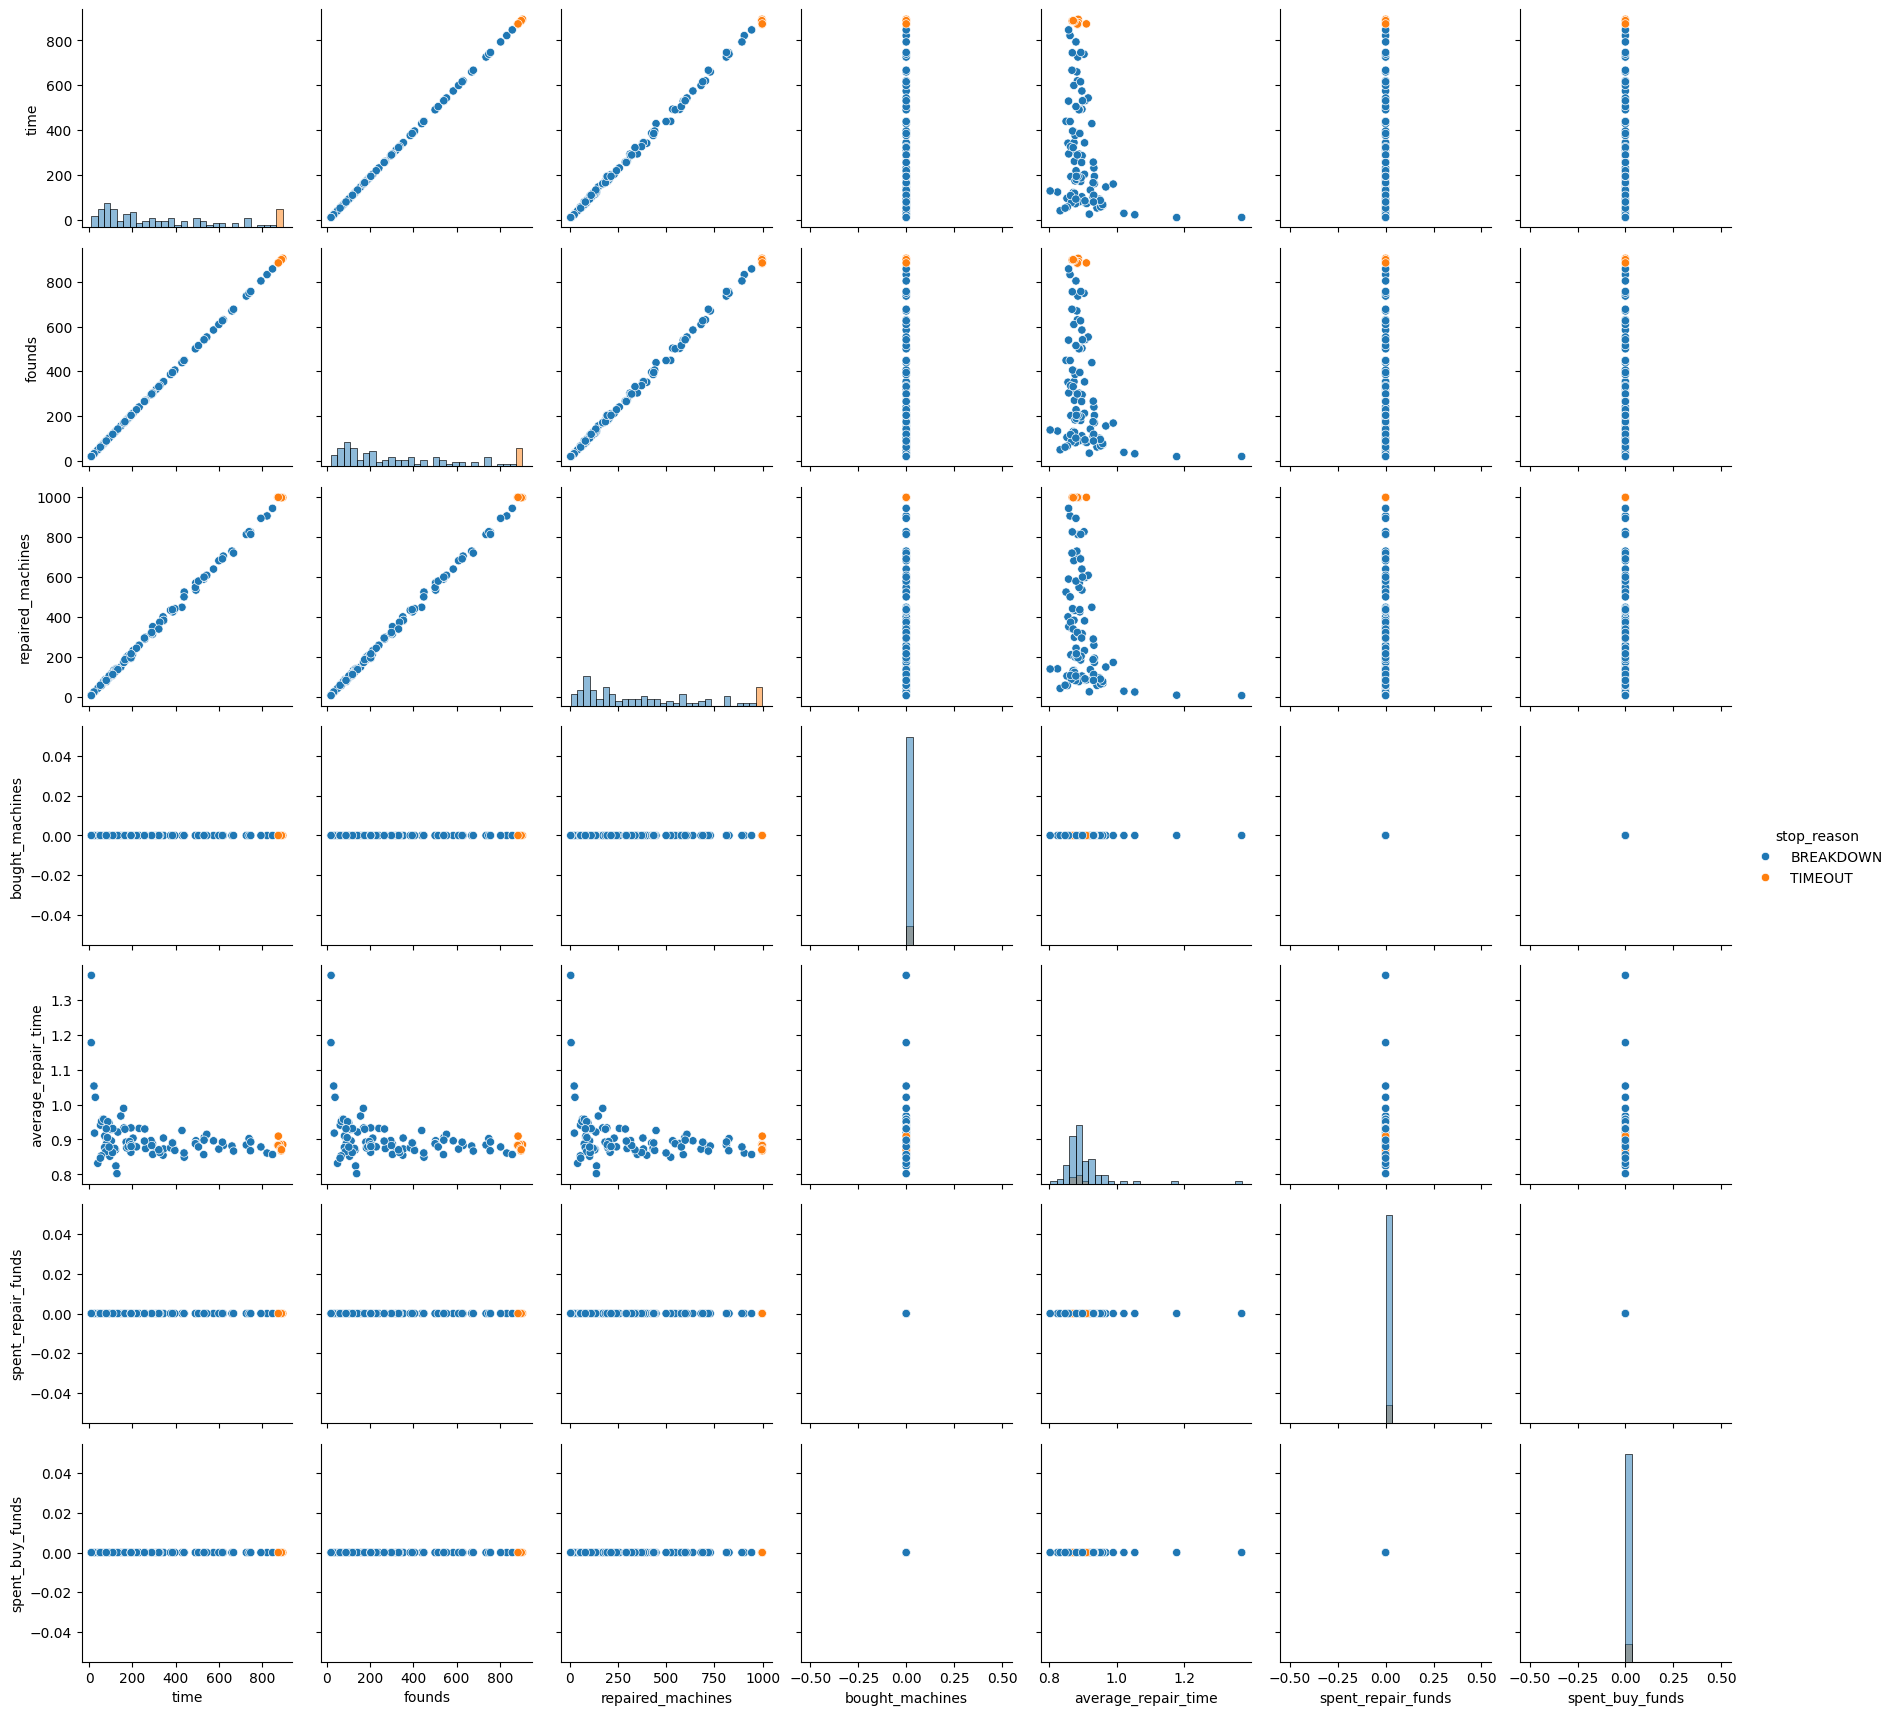

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000            100.0   
mean   330.588573  340.588573         368.460000              0.0   
std    270.751990  270.751990         305.636426              0.0   
min      9.609432   19.609432           6.000000              0.0   
25%    102.538358  112.538358         106.250000              0.0   
50%    243.075021  253.075021         273.500000              0.0   
75%    511.052499  521.052499         581.500000              0.0   
max    894.283496  904.283496         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000               100.0            100.0  
mean              0.901663                 0.0              0.0  
std               0.066938                 0.0              0.0  
min               0.802240                 0.0              0.0  
25%               0.871507                 0.0              0.0  
50%               0.885689                 0.0              0.0  
75%               0.911590                 0.0              0.0  
max               1.370005                 0.0              0.0

In [28]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_id, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    lambda : 0, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_2_0 = pd.DataFrame(results)

plot = sns.PairGrid(df_2_0, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()

df_2_0.describe()

#### 1.1 - Aumentar el numero de maquinas de repuesto

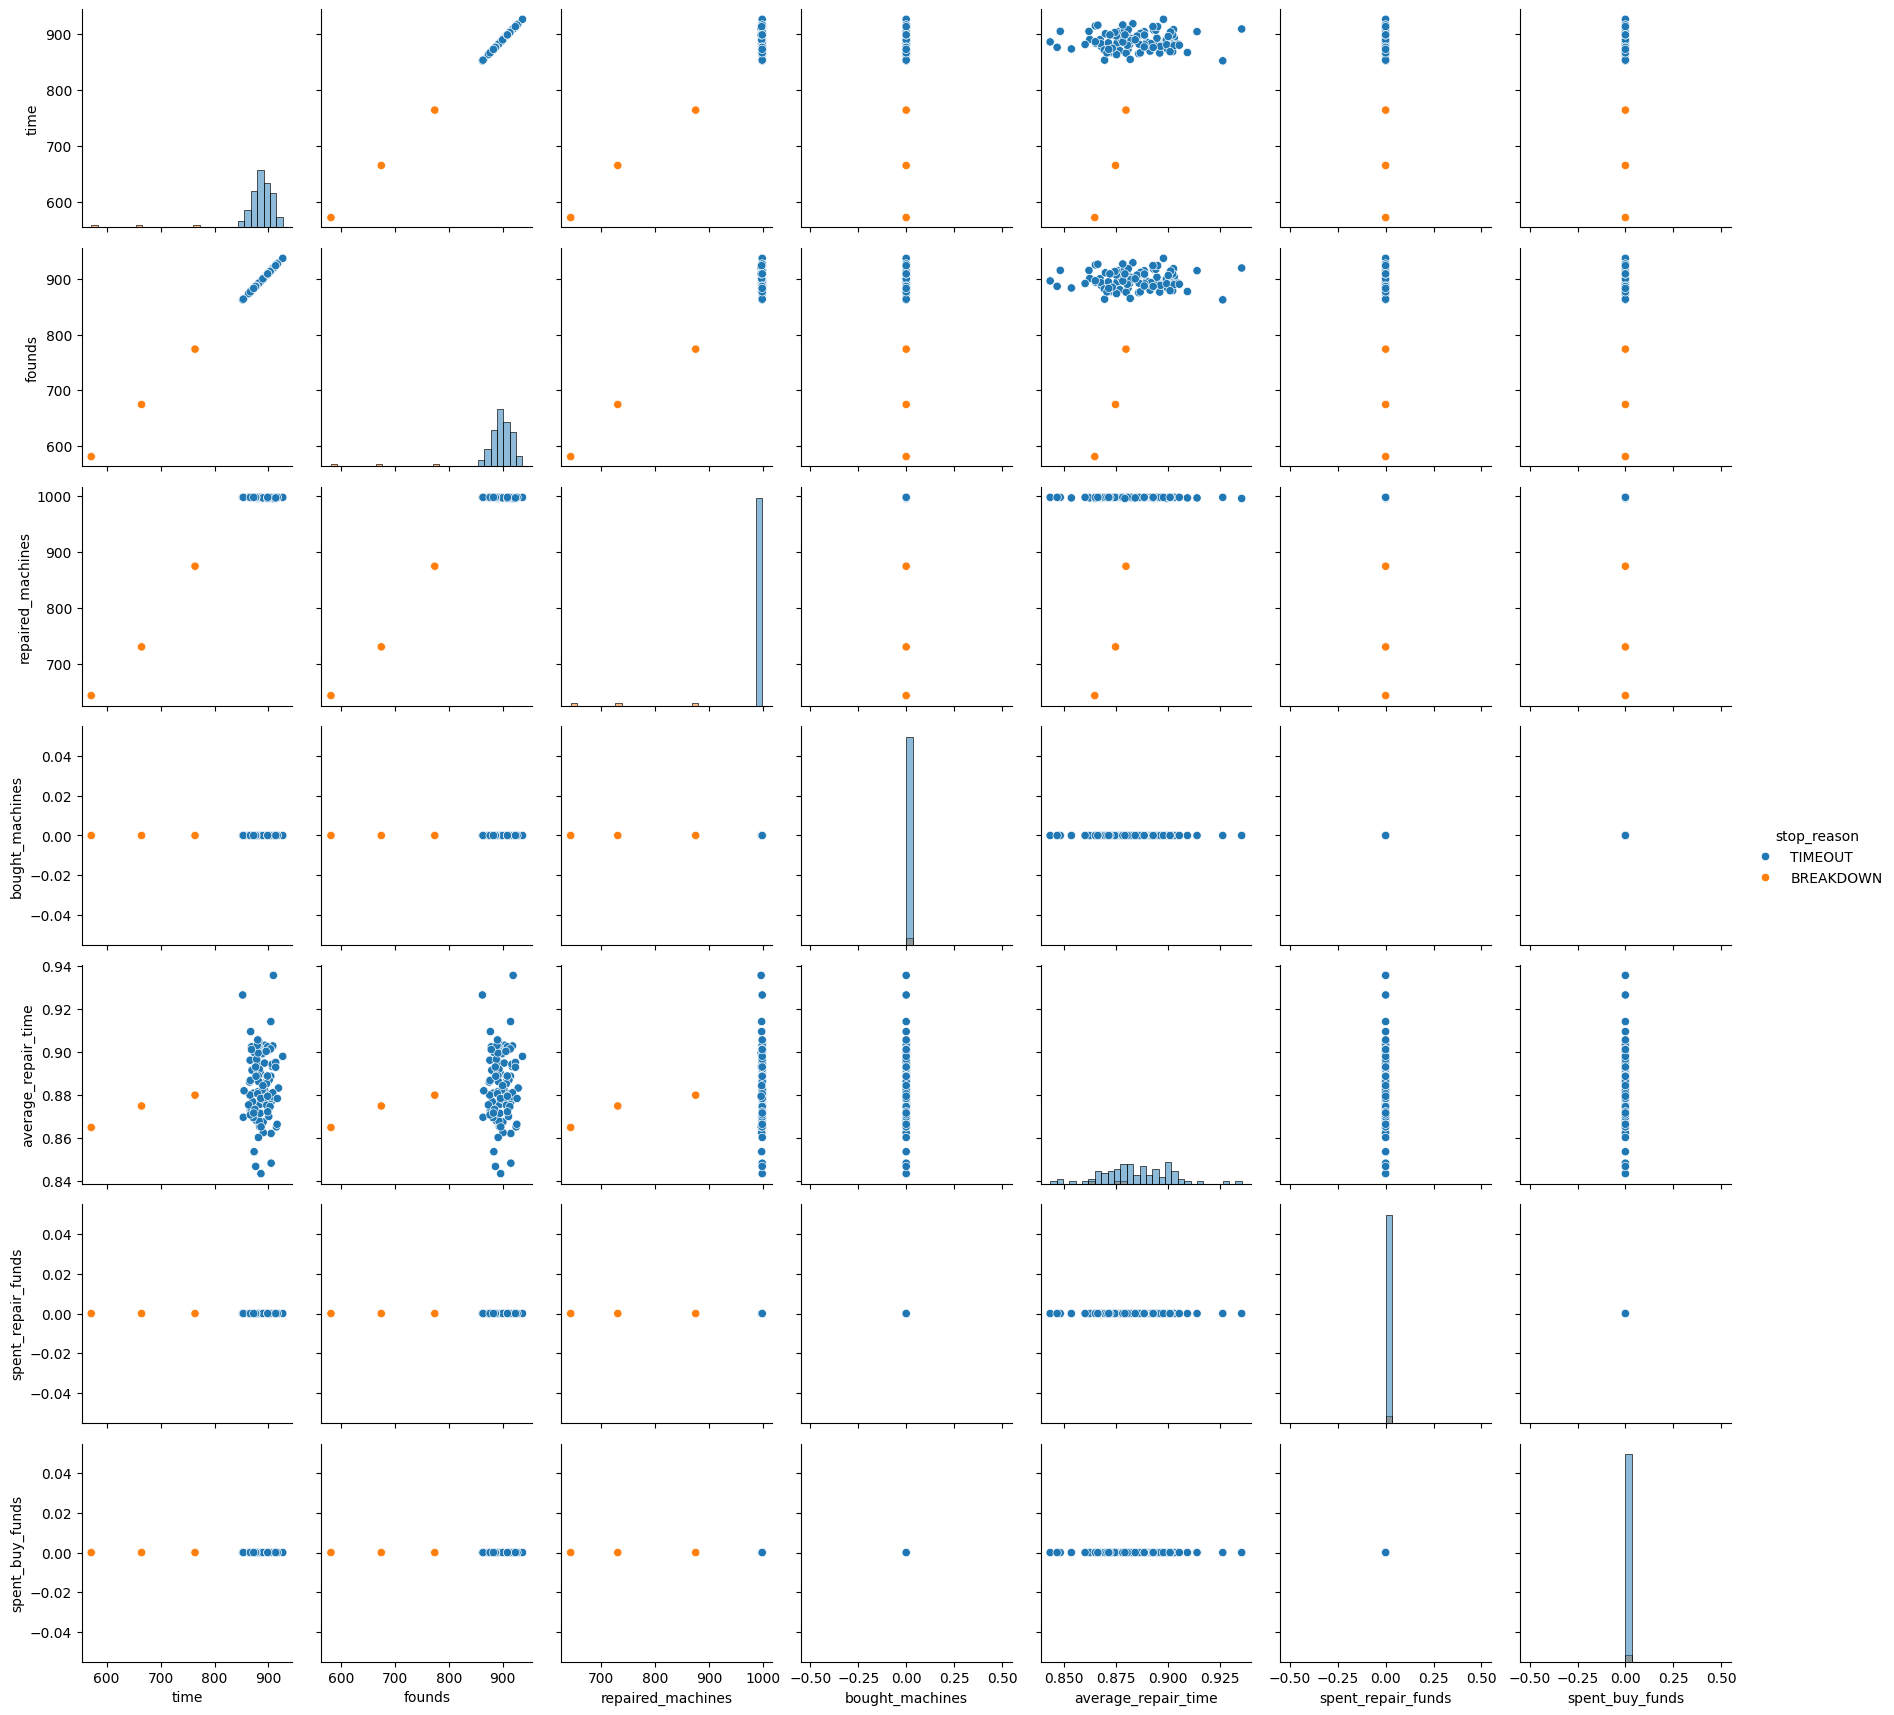

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000            100.0   
mean   881.379680  891.379680         990.360000              0.0   
std     43.272404   43.272404          45.607797              0.0   
min    571.358968  581.358968         644.000000              0.0   
25%    875.837590  885.837590         998.000000              0.0   
50%    886.034097  896.034097         998.000000              0.0   
75%    898.655275  908.655275         998.000000              0.0   
max    926.601212  936.601212         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000               100.0            100.0  
mean              0.884335                 0.0              0.0  
std               0.015876                 0.0              0.0  
min               0.843543                 0.0              0.0  
25%               0.874366                 0.0              0.0  
50%               0.882621                 0.0              0.0  
75%               0.895464                 0.0              0.0  
max               0.935633                 0.0              0.0

In [29]:
results = [simulate(20, # cantidad de maquinas
                    10, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_id, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    lambda: 0, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_3 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_3, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()

df_1_3.describe()

#### 1.2 - Usar SJF para manejar los tiempos de reparacion

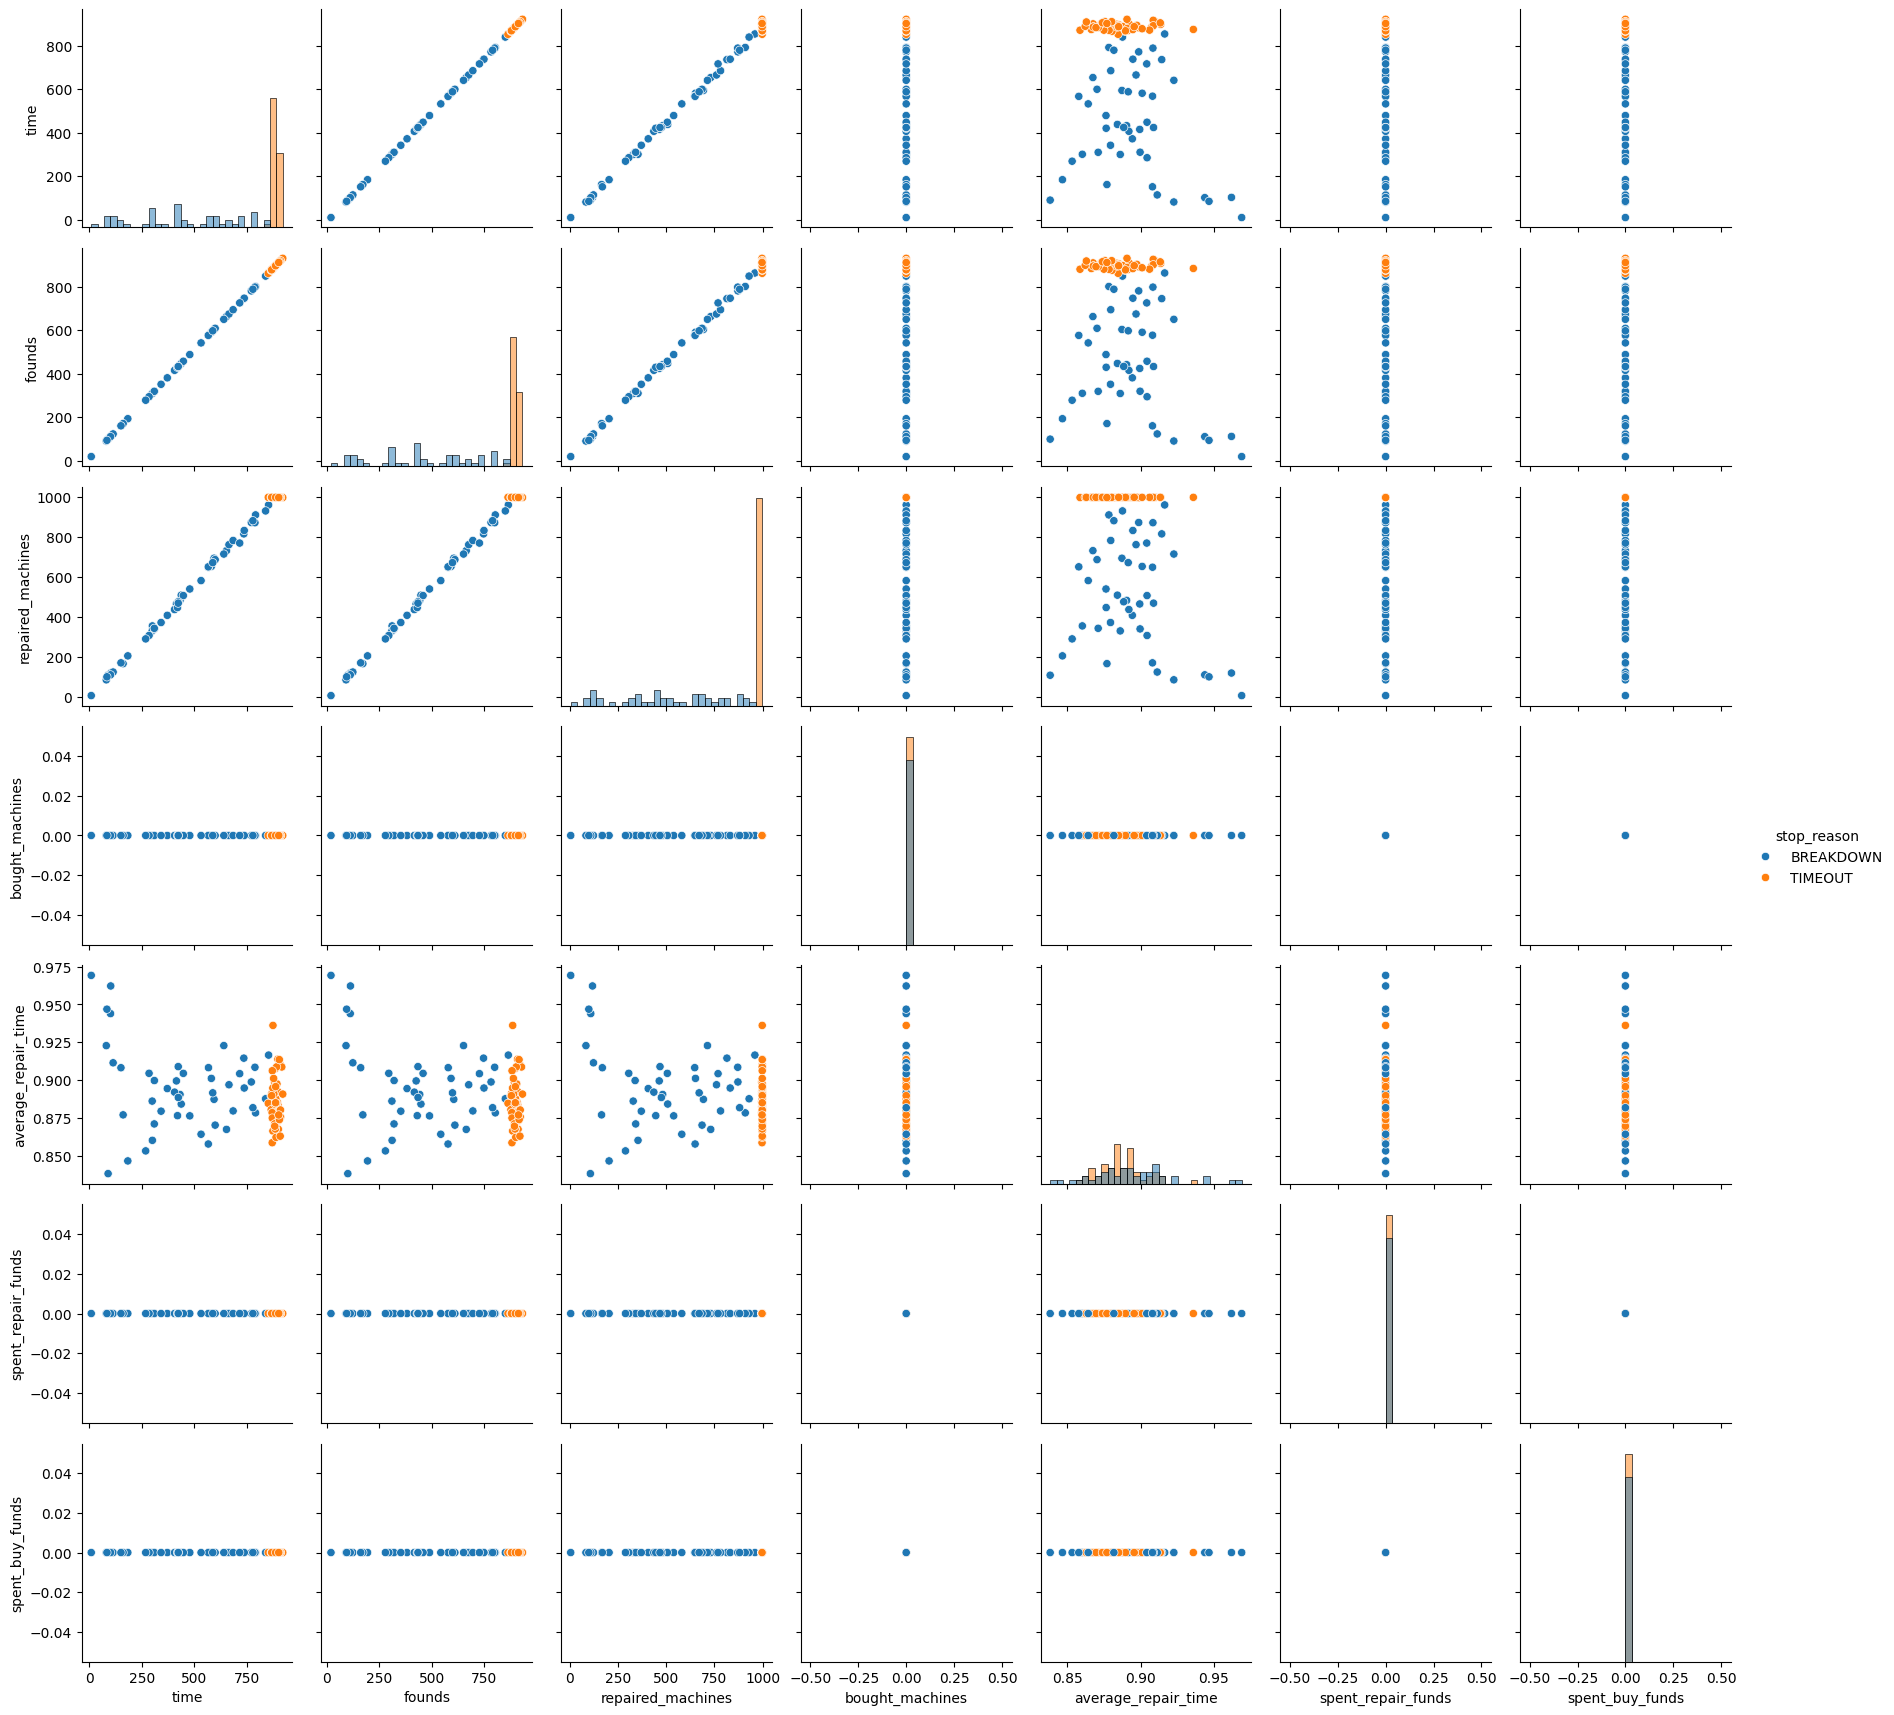

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000            100.0   
mean   681.468208  691.468208         765.340000              0.0   
std    273.962842  273.962842         309.524928              0.0   
min      9.076052   19.076052           5.000000              0.0   
25%    445.288967  455.288967         507.500000              0.0   
50%    867.342758  877.342758         996.500000              0.0   
75%    886.883530  896.883530         998.000000              0.0   
max    921.463053  931.463053         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000               100.0            100.0  
mean              0.890396                 0.0              0.0  
std               0.021862                 0.0              0.0  
min               0.838165                 0.0              0.0  
25%               0.876999                 0.0              0.0  
50%               0.888527                 0.0              0.0  
75%               0.901083                 0.0              0.0  
max               0.969195                 0.0              0.0

In [30]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_id, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    lambda : 0, # distribucion de los costos de reparacion
                    1000, sjf=True) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_2 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_2, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()

df_1_2.describe()

#### 1.3 - Usar una distribucion para el costo de reparacion

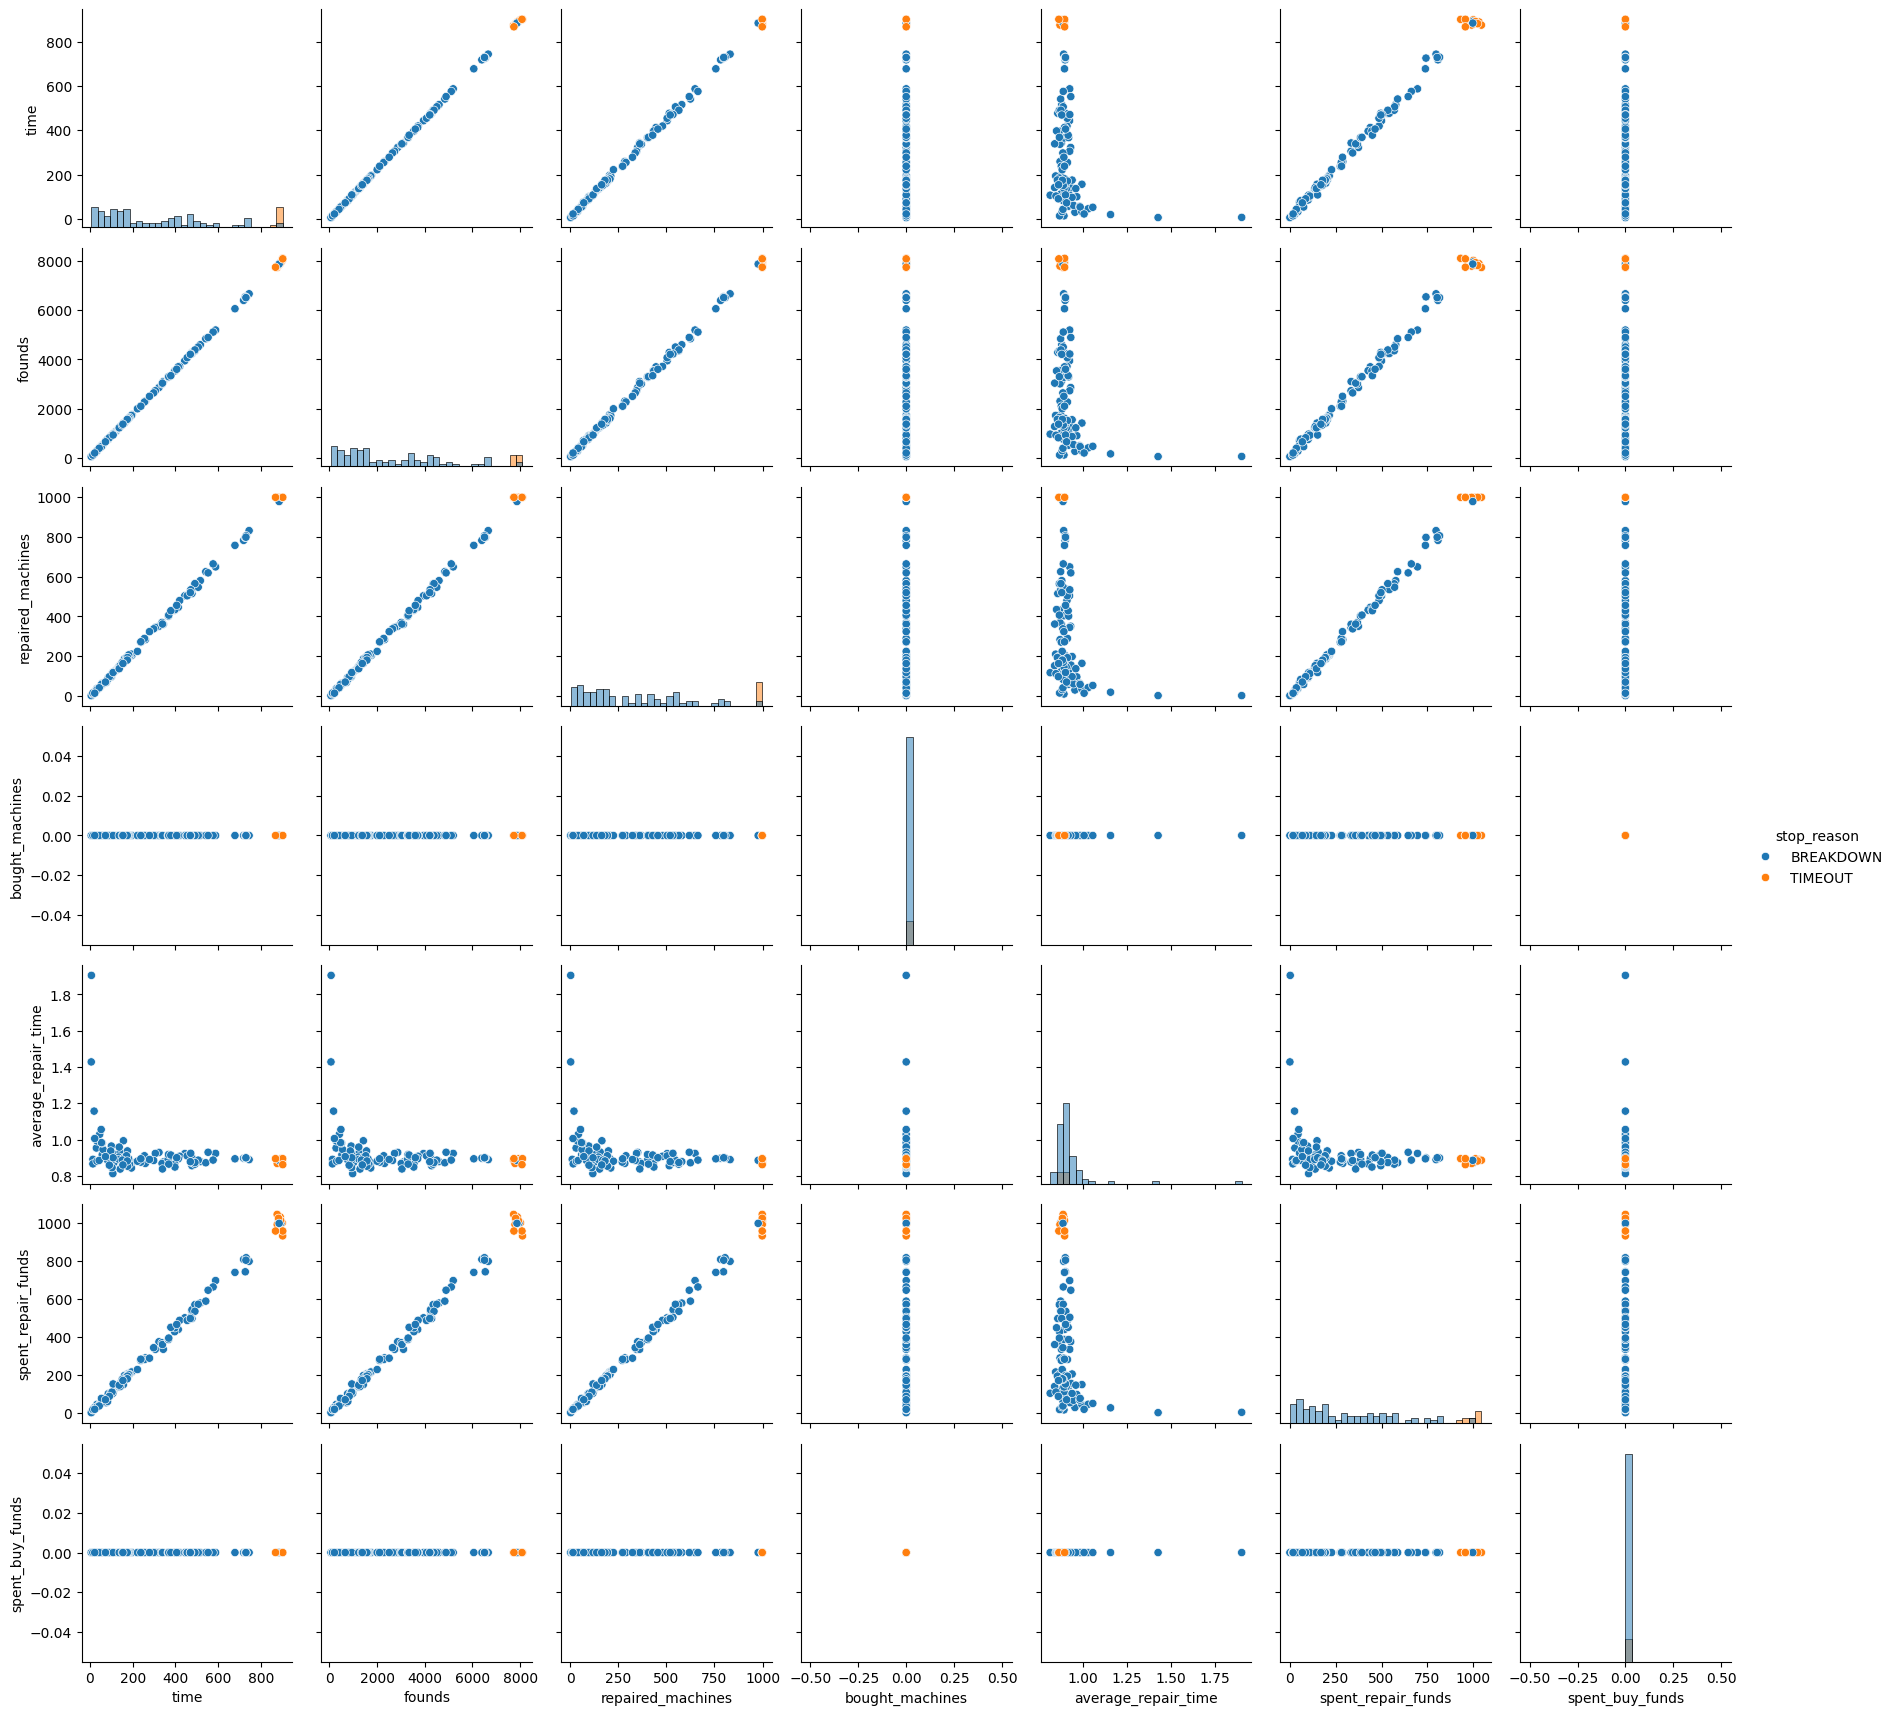

time       founds  repaired_machines  bought_machines  \
count  100.000000   100.000000         100.000000            100.0   
mean   340.461216  3038.765506         377.730000              0.0   
std    280.436432  2489.839275         315.683765              0.0   
min      6.079705    69.730729           3.000000              0.0   
25%    107.632935   968.057472         118.750000              0.0   
50%    257.095389  2296.209279         287.000000              0.0   
75%    491.053278  4360.815399         551.250000              0.0   
max    902.037167  8095.421426         998.000000              0.0   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000            100.0  
mean              0.916967          375.846658              0.0  
std               0.122447          315.313730              0.0  
min               0.812139            1.066319              0.0  
25%               0.875042          110.804630              0.0  
50%               0.892788          284.842338              0.0  
75%               0.917403          549.032516              0.0  
max               1.904888         1043.625393              0.0

In [31]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    0, # costo de compra
                    0, # tiempo de entrega
                    profit_function_ln, # funcion de ganancia
                    decition_function_id, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_1_3 = pd.DataFrame(results)

plot = sns.PairGrid(df_1_3, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_1_3.describe()

### 2 - Usar una funcion de decision lineal

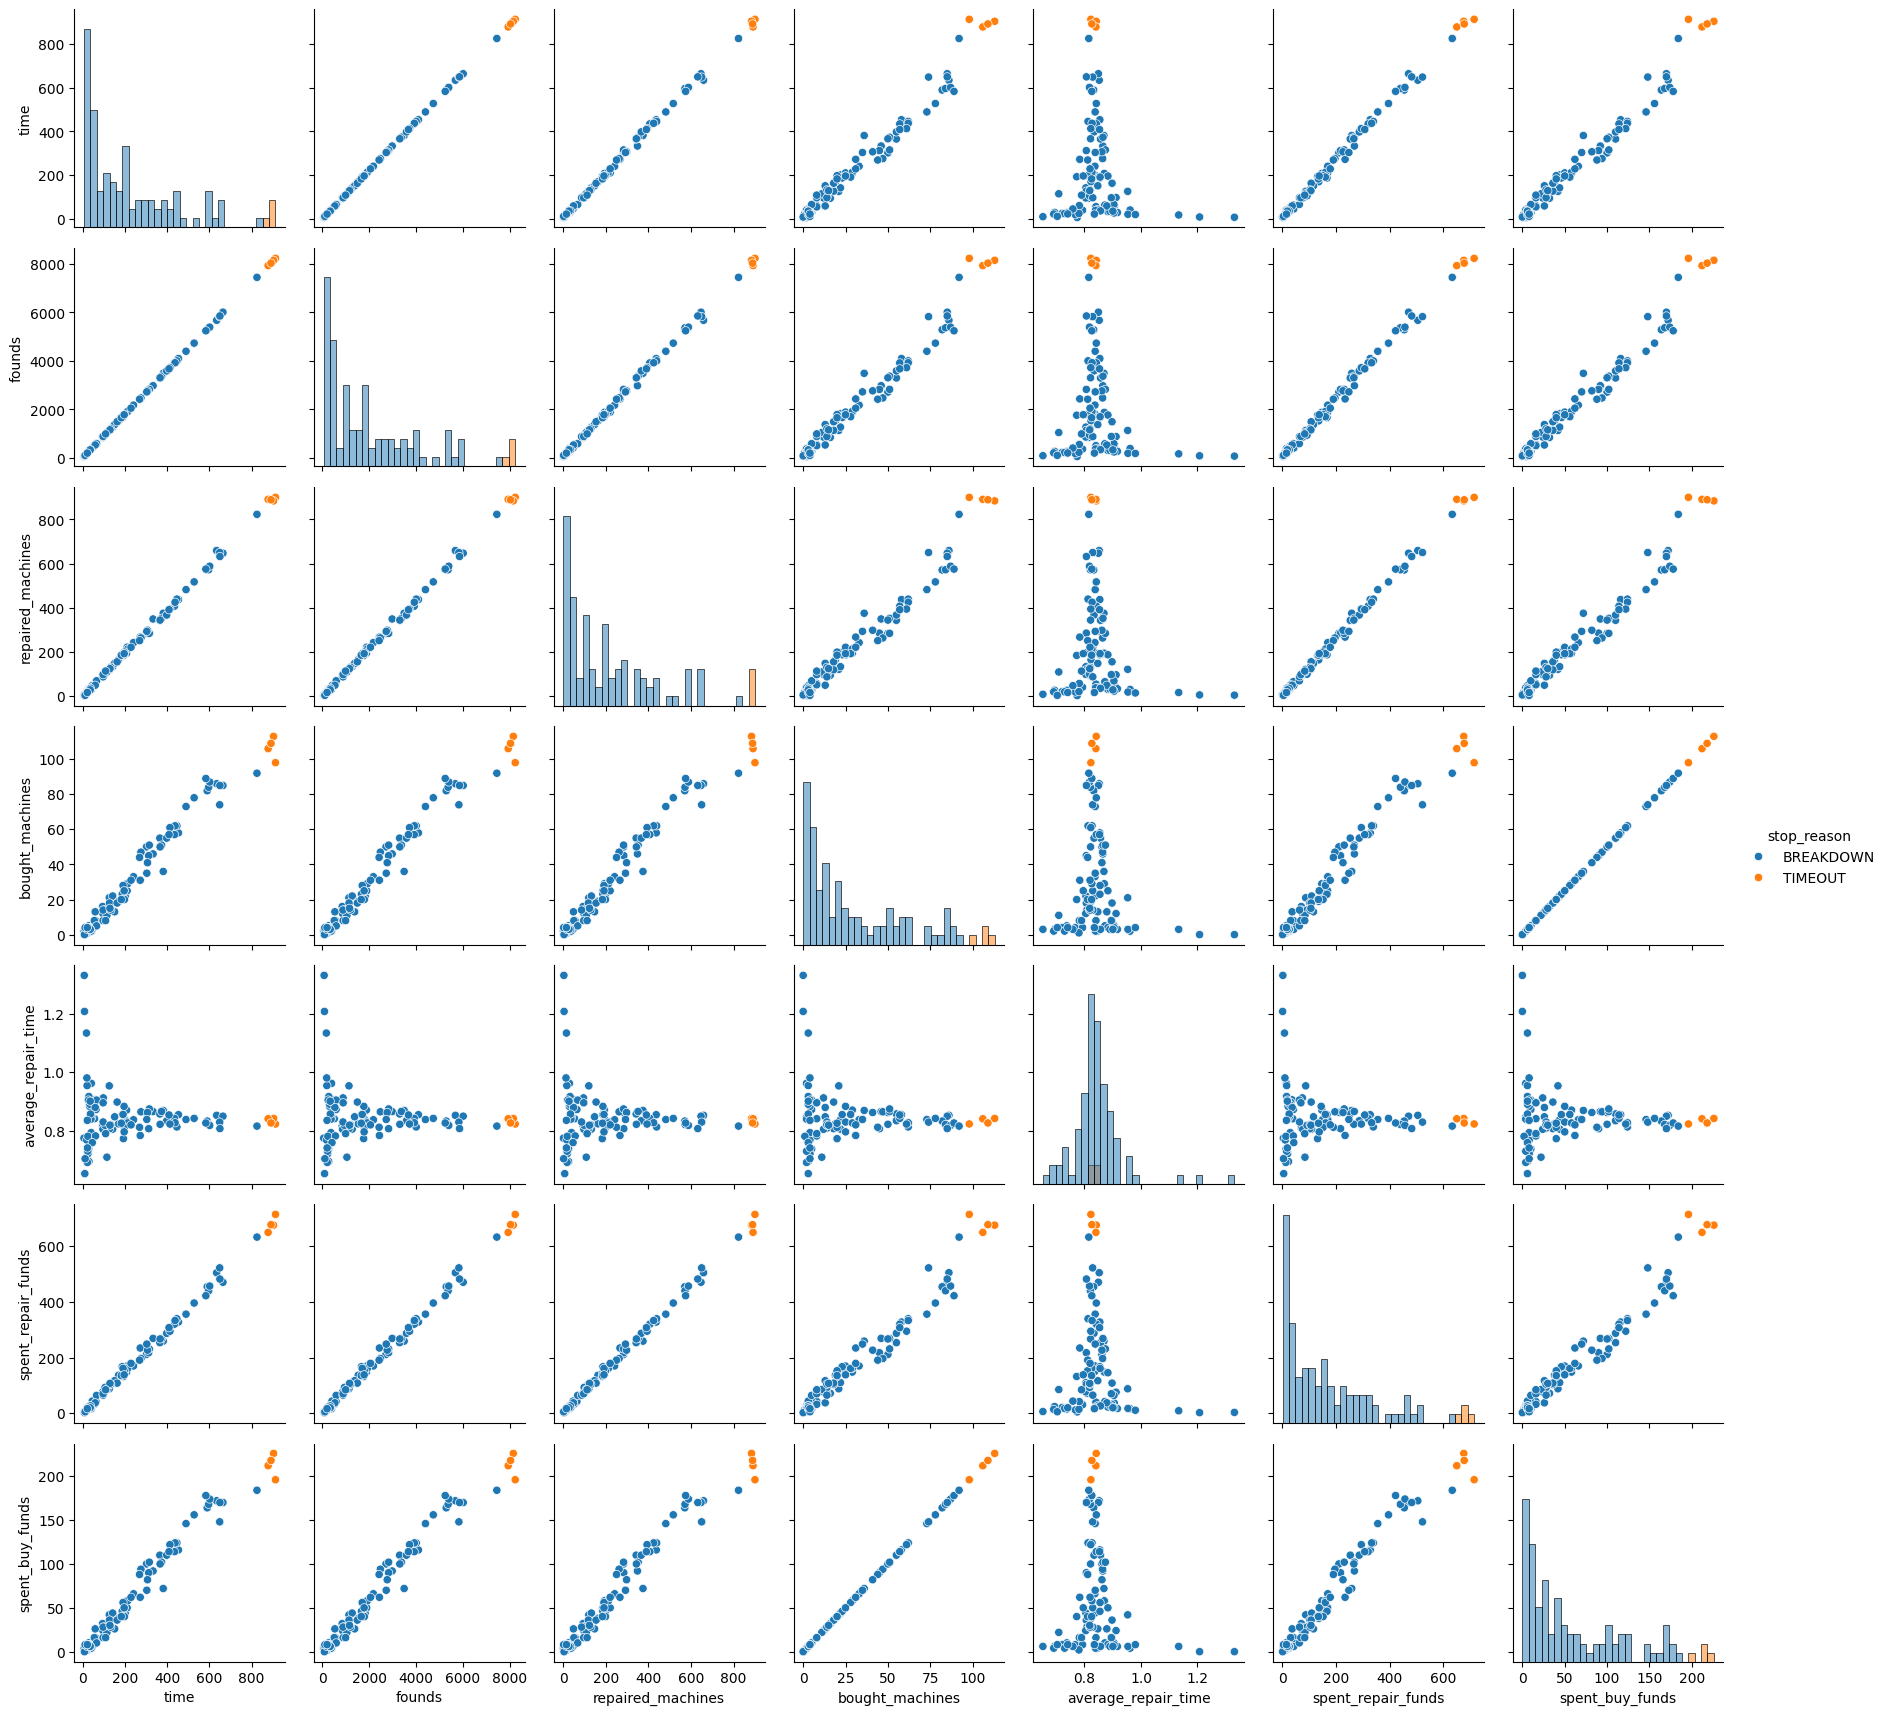

time       founds  repaired_machines  bought_machines  \
count  100.000000   100.000000         100.000000       100.000000   
mean   233.877951  2113.039957         227.480000        30.470000   
std    236.253701  2123.587973         233.732969        30.700395   
min      5.763432    59.007054           2.000000         0.000000   
25%     40.199713   388.199598          38.500000         4.000000   
50%    156.969094  1436.150640         151.500000        19.500000   
75%    365.612311  3301.682881         345.250000        50.250000   
max    913.277214  8232.240529         900.000000       113.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000        100.00000  
mean              0.843187          174.939553         60.94000  
std               0.089272          178.826397         61.40079  
min               0.652755            2.050795          0.00000  
25%               0.810320           27.566672          8.00000  
50%               0.834406          113.477922         39.00000  
75%               0.865147          261.072549        100.50000  
max               1.331000          714.531607        226.00000

In [32]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_ln, # funcion de ganancia
                    decition_function_ln, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_2_0 = pd.DataFrame(results)

plot = sns.PairGrid(df_2_0, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_2_0.describe()

#### 2.1 - Usar funcion de ganancia $sen(t) + 1$

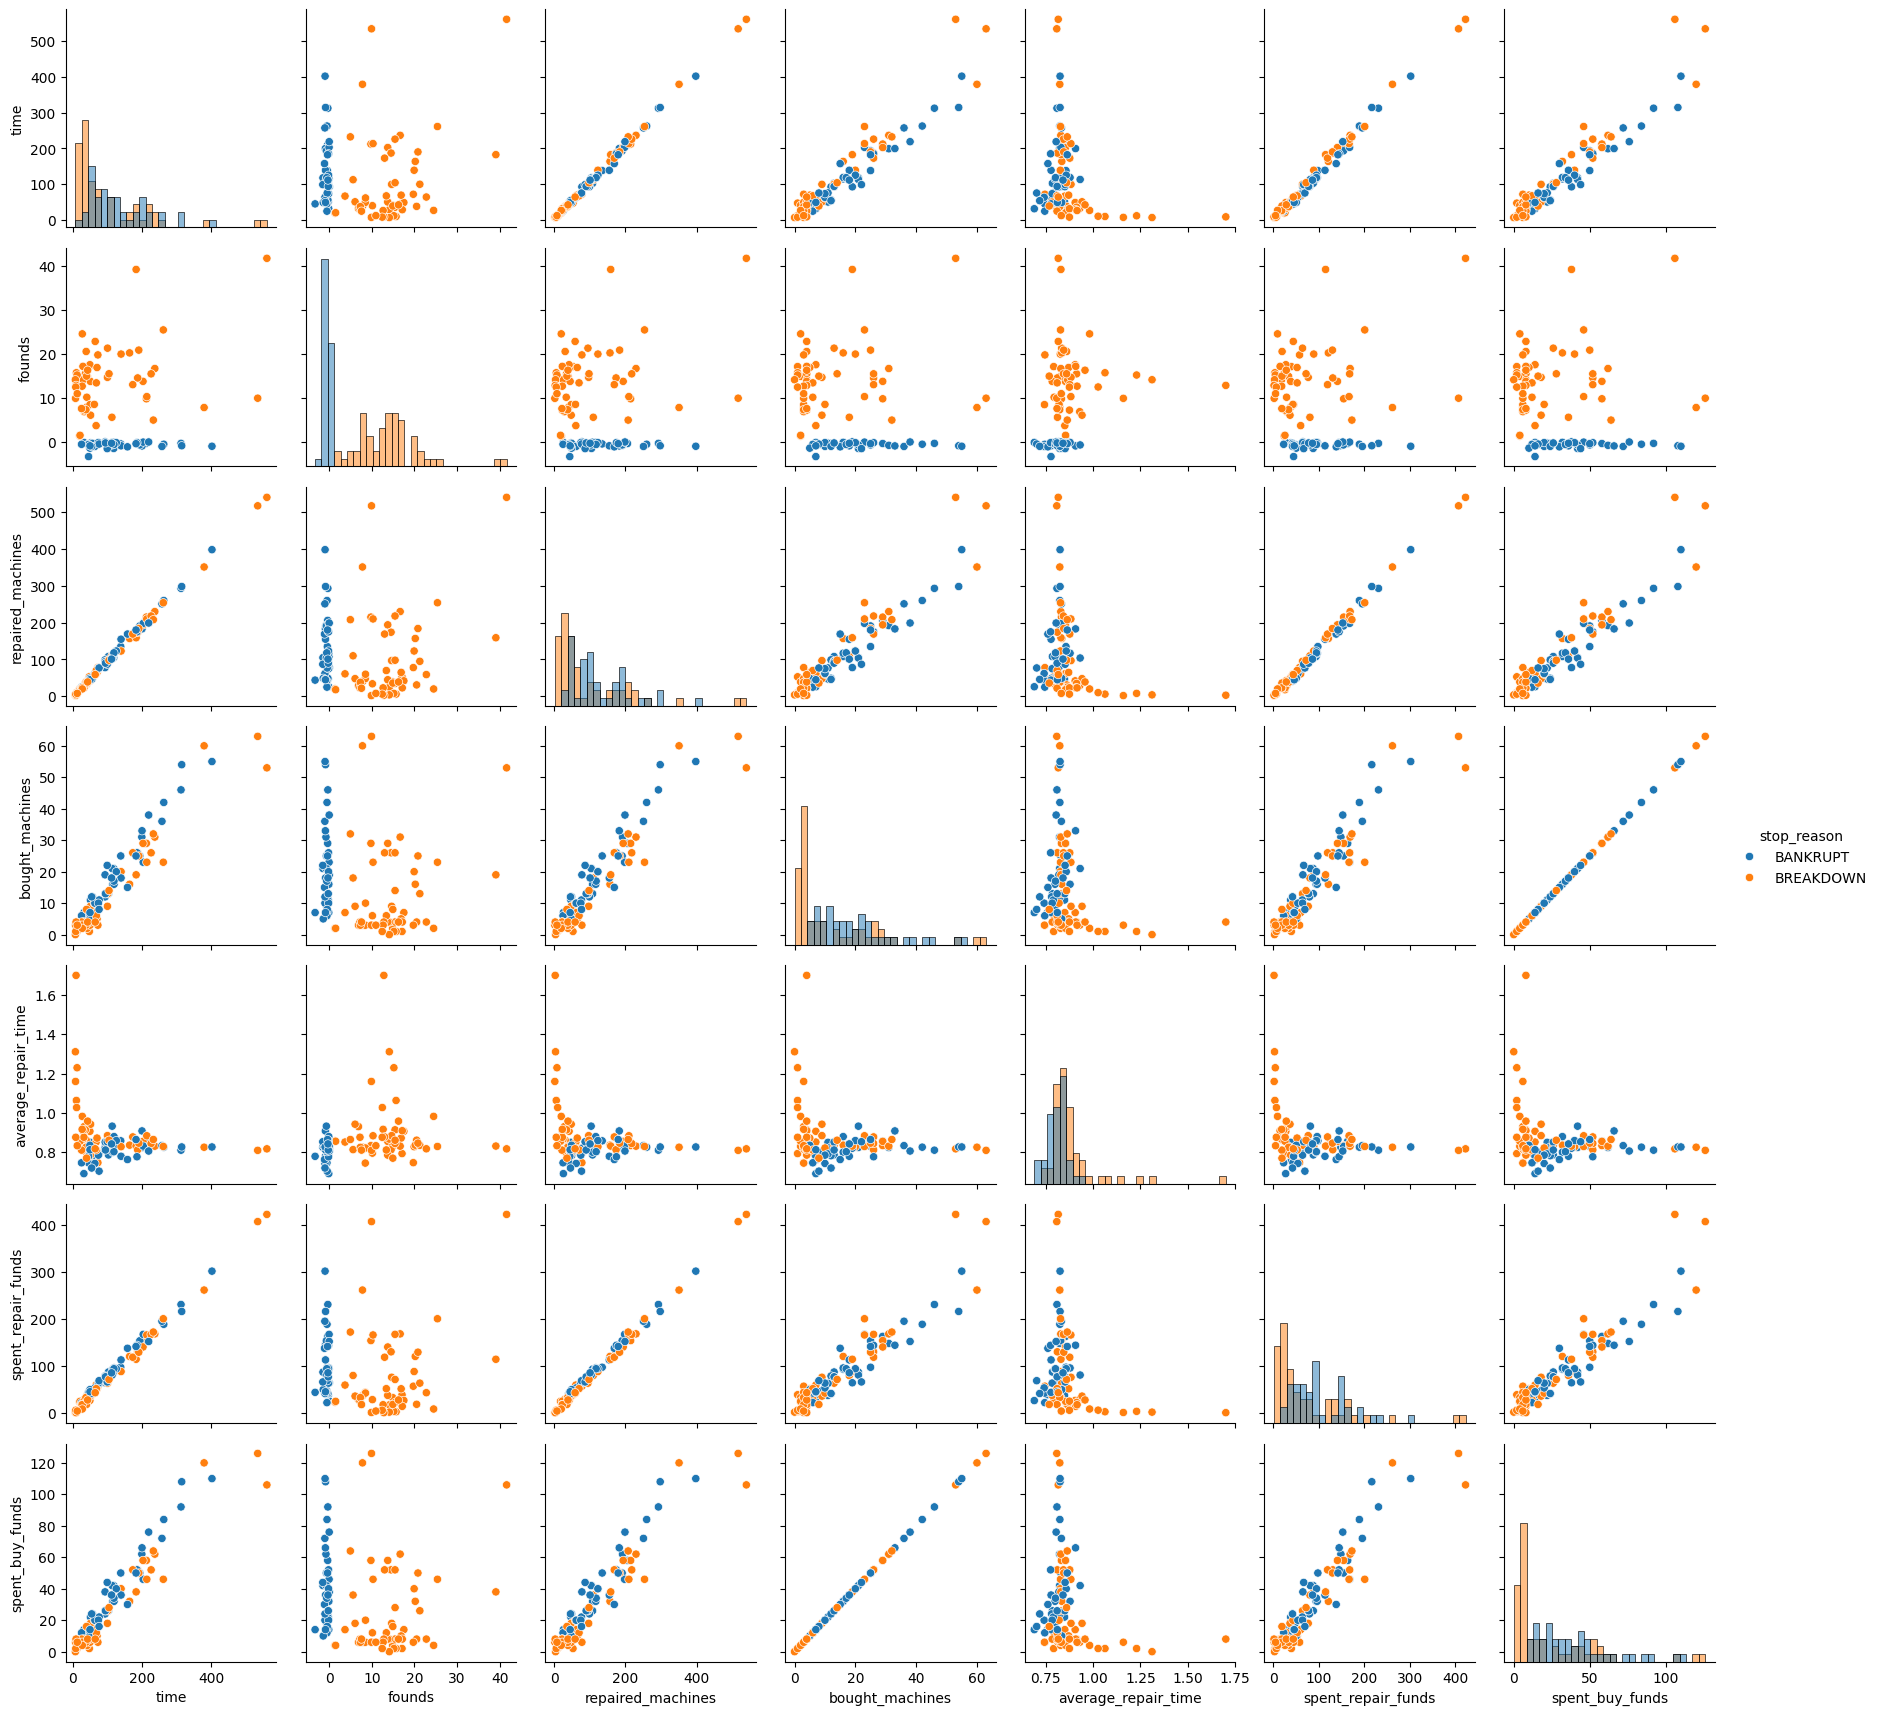

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean   115.606330    7.630557         110.450000        15.600000   
std    106.390199    9.245205         103.230093        14.231846   
min      7.134539   -3.338626           2.000000         0.000000   
25%     41.153088   -0.414622          39.000000         4.000000   
50%     75.768073    6.446035          77.500000        11.500000   
75%    182.420896   14.531203         170.250000        23.000000   
max    560.305407   41.628583         540.000000        63.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.853619           86.571696        31.200000  
std               0.125399           78.942256        28.463693  
min               0.688501            1.264255         0.000000  
25%               0.806607           32.287800         8.000000  
50%               0.828537           63.957620        23.000000  
75%               0.862749          129.844323        46.000000  
max               1.701517          422.224935       126.000000

In [33]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_ln, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_2_1 = pd.DataFrame(results)

plot = sns.PairGrid(df_2_1, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_2_1.describe()

### 3 - Usando la funcion de ganancia sn_lg probar las funciones de decision cuadraticas

#### 3.0 - Funcion de decision lineal

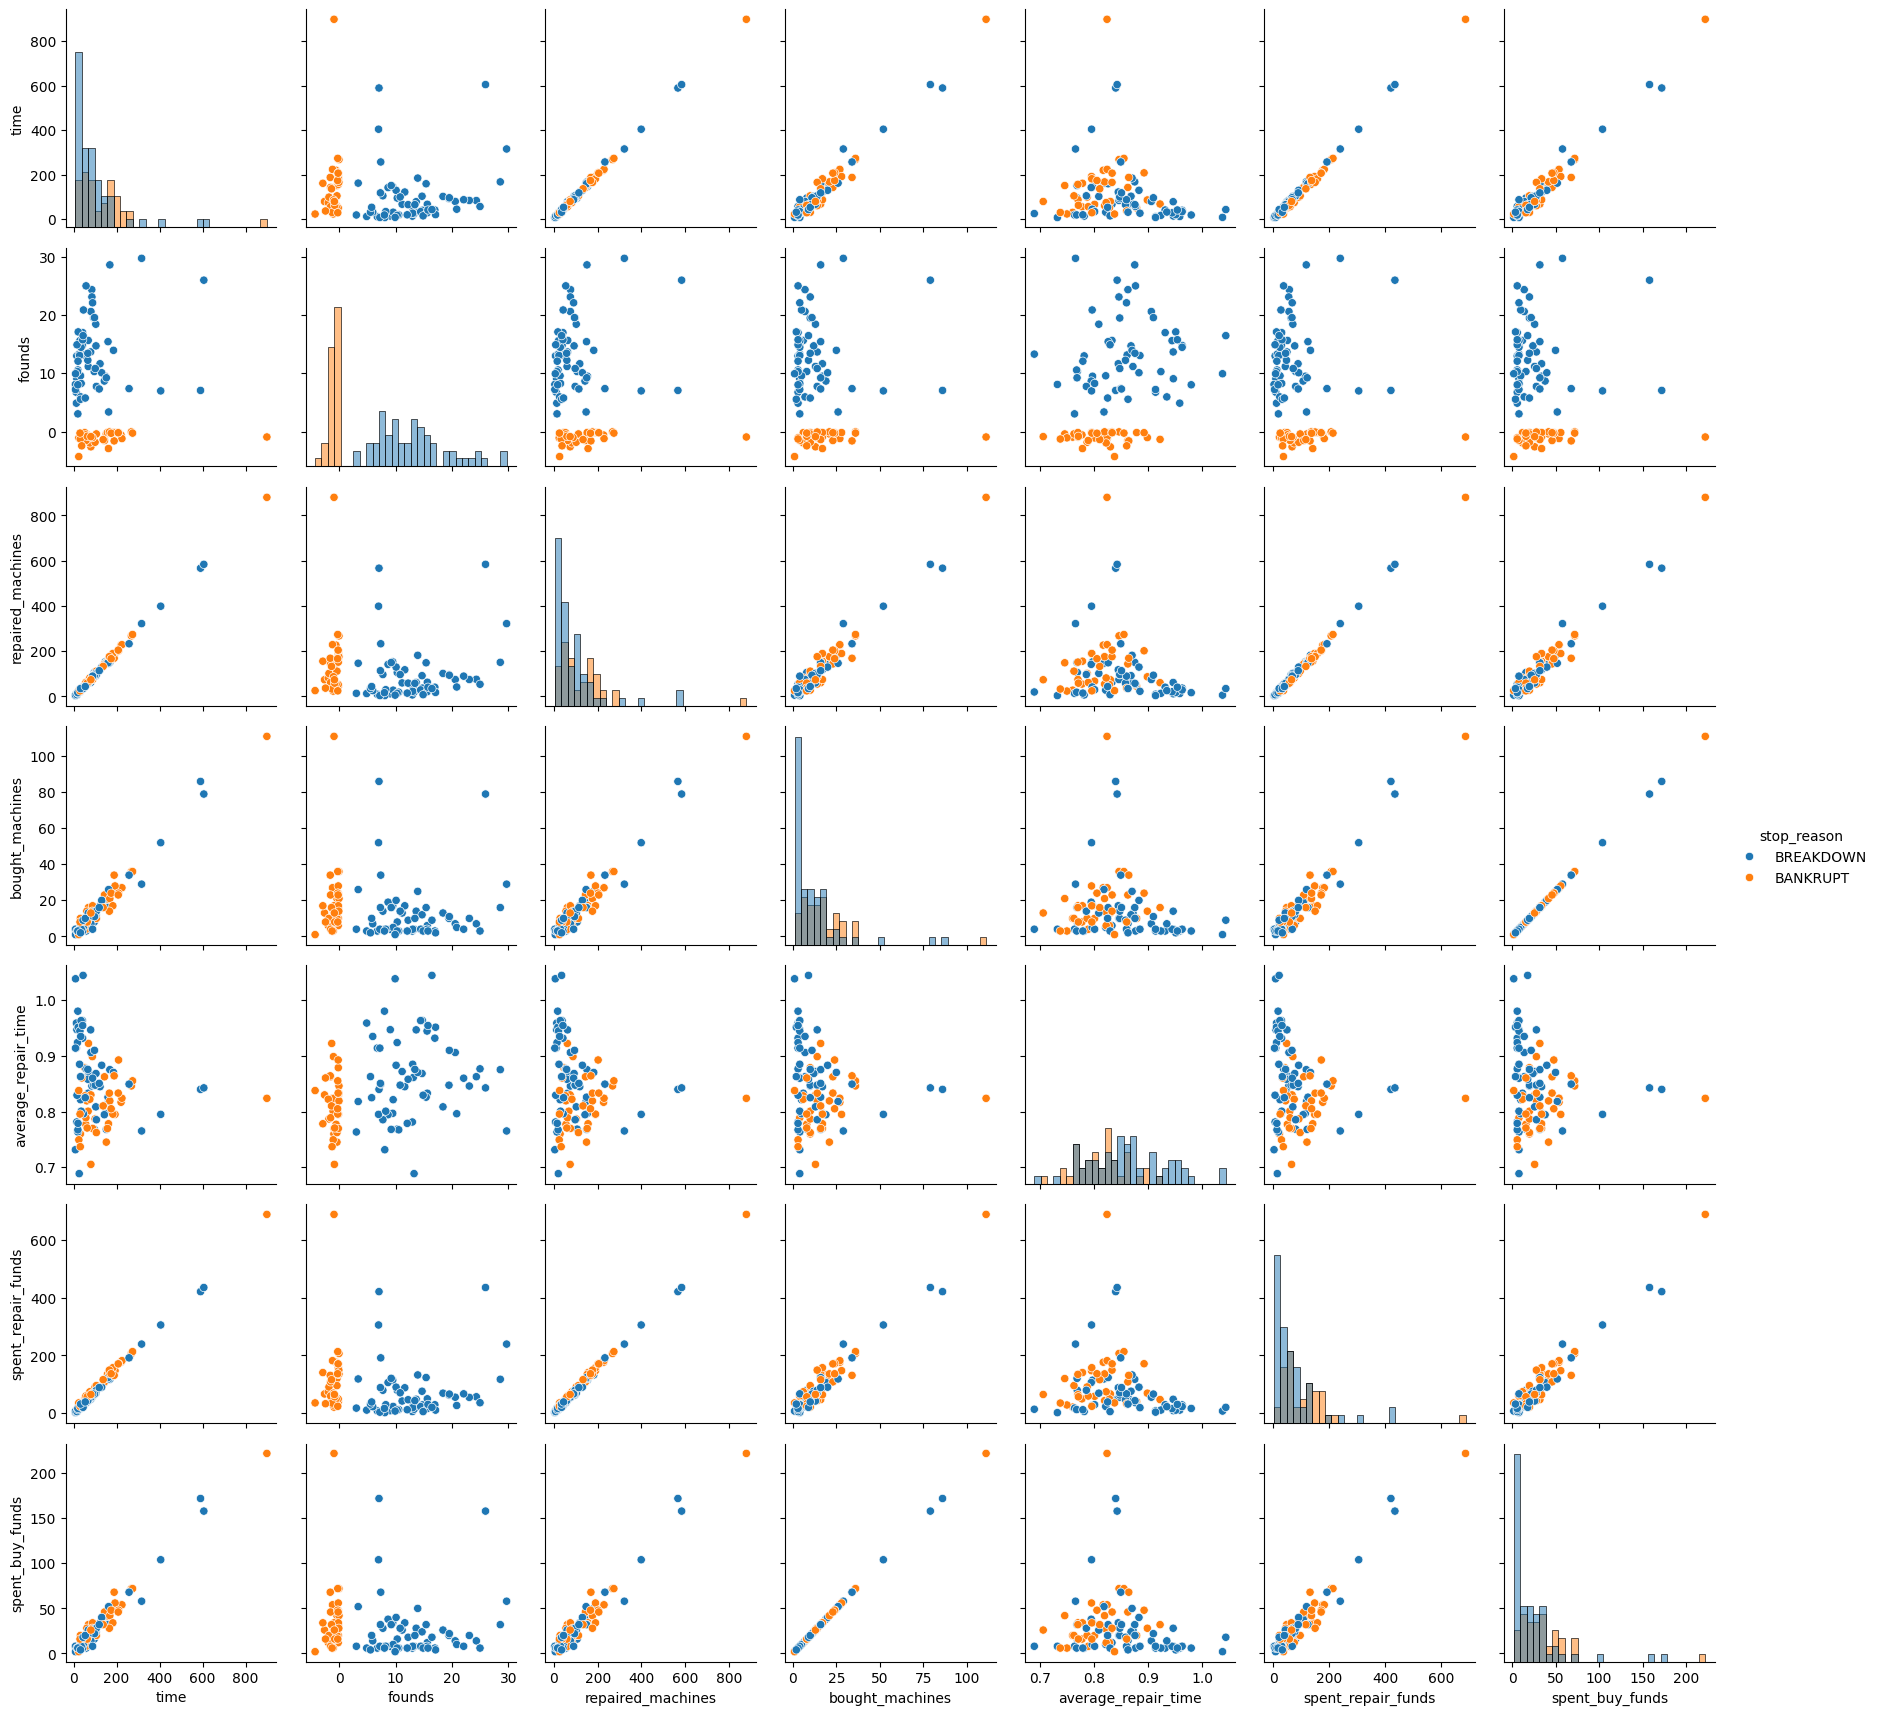

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean   112.825879    7.638199         108.720000        14.550000   
std    130.580519    8.456496         128.391611        16.820127   
min      8.037118   -4.276505           4.000000         1.000000   
25%     34.137034   -0.395715          32.250000         4.000000   
50%     79.760491    7.345208          74.000000        10.000000   
75%    152.015967   13.492410         149.000000        17.000000   
max    899.225981   29.717245         880.000000       111.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.841921           86.157111        29.100000  
std               0.068022           98.447496        33.640254  
min               0.688774            2.127241         2.000000  
25%               0.794866           28.781815         8.000000  
50%               0.832895           57.801310        20.000000  
75%               0.875601          117.771519        34.000000  
max               1.043687          687.400143       222.000000

In [34]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_ln, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_0 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_0, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_0.describe()

#### 3.1 - Funcion de decision random (uniforme ~ {0, 1})

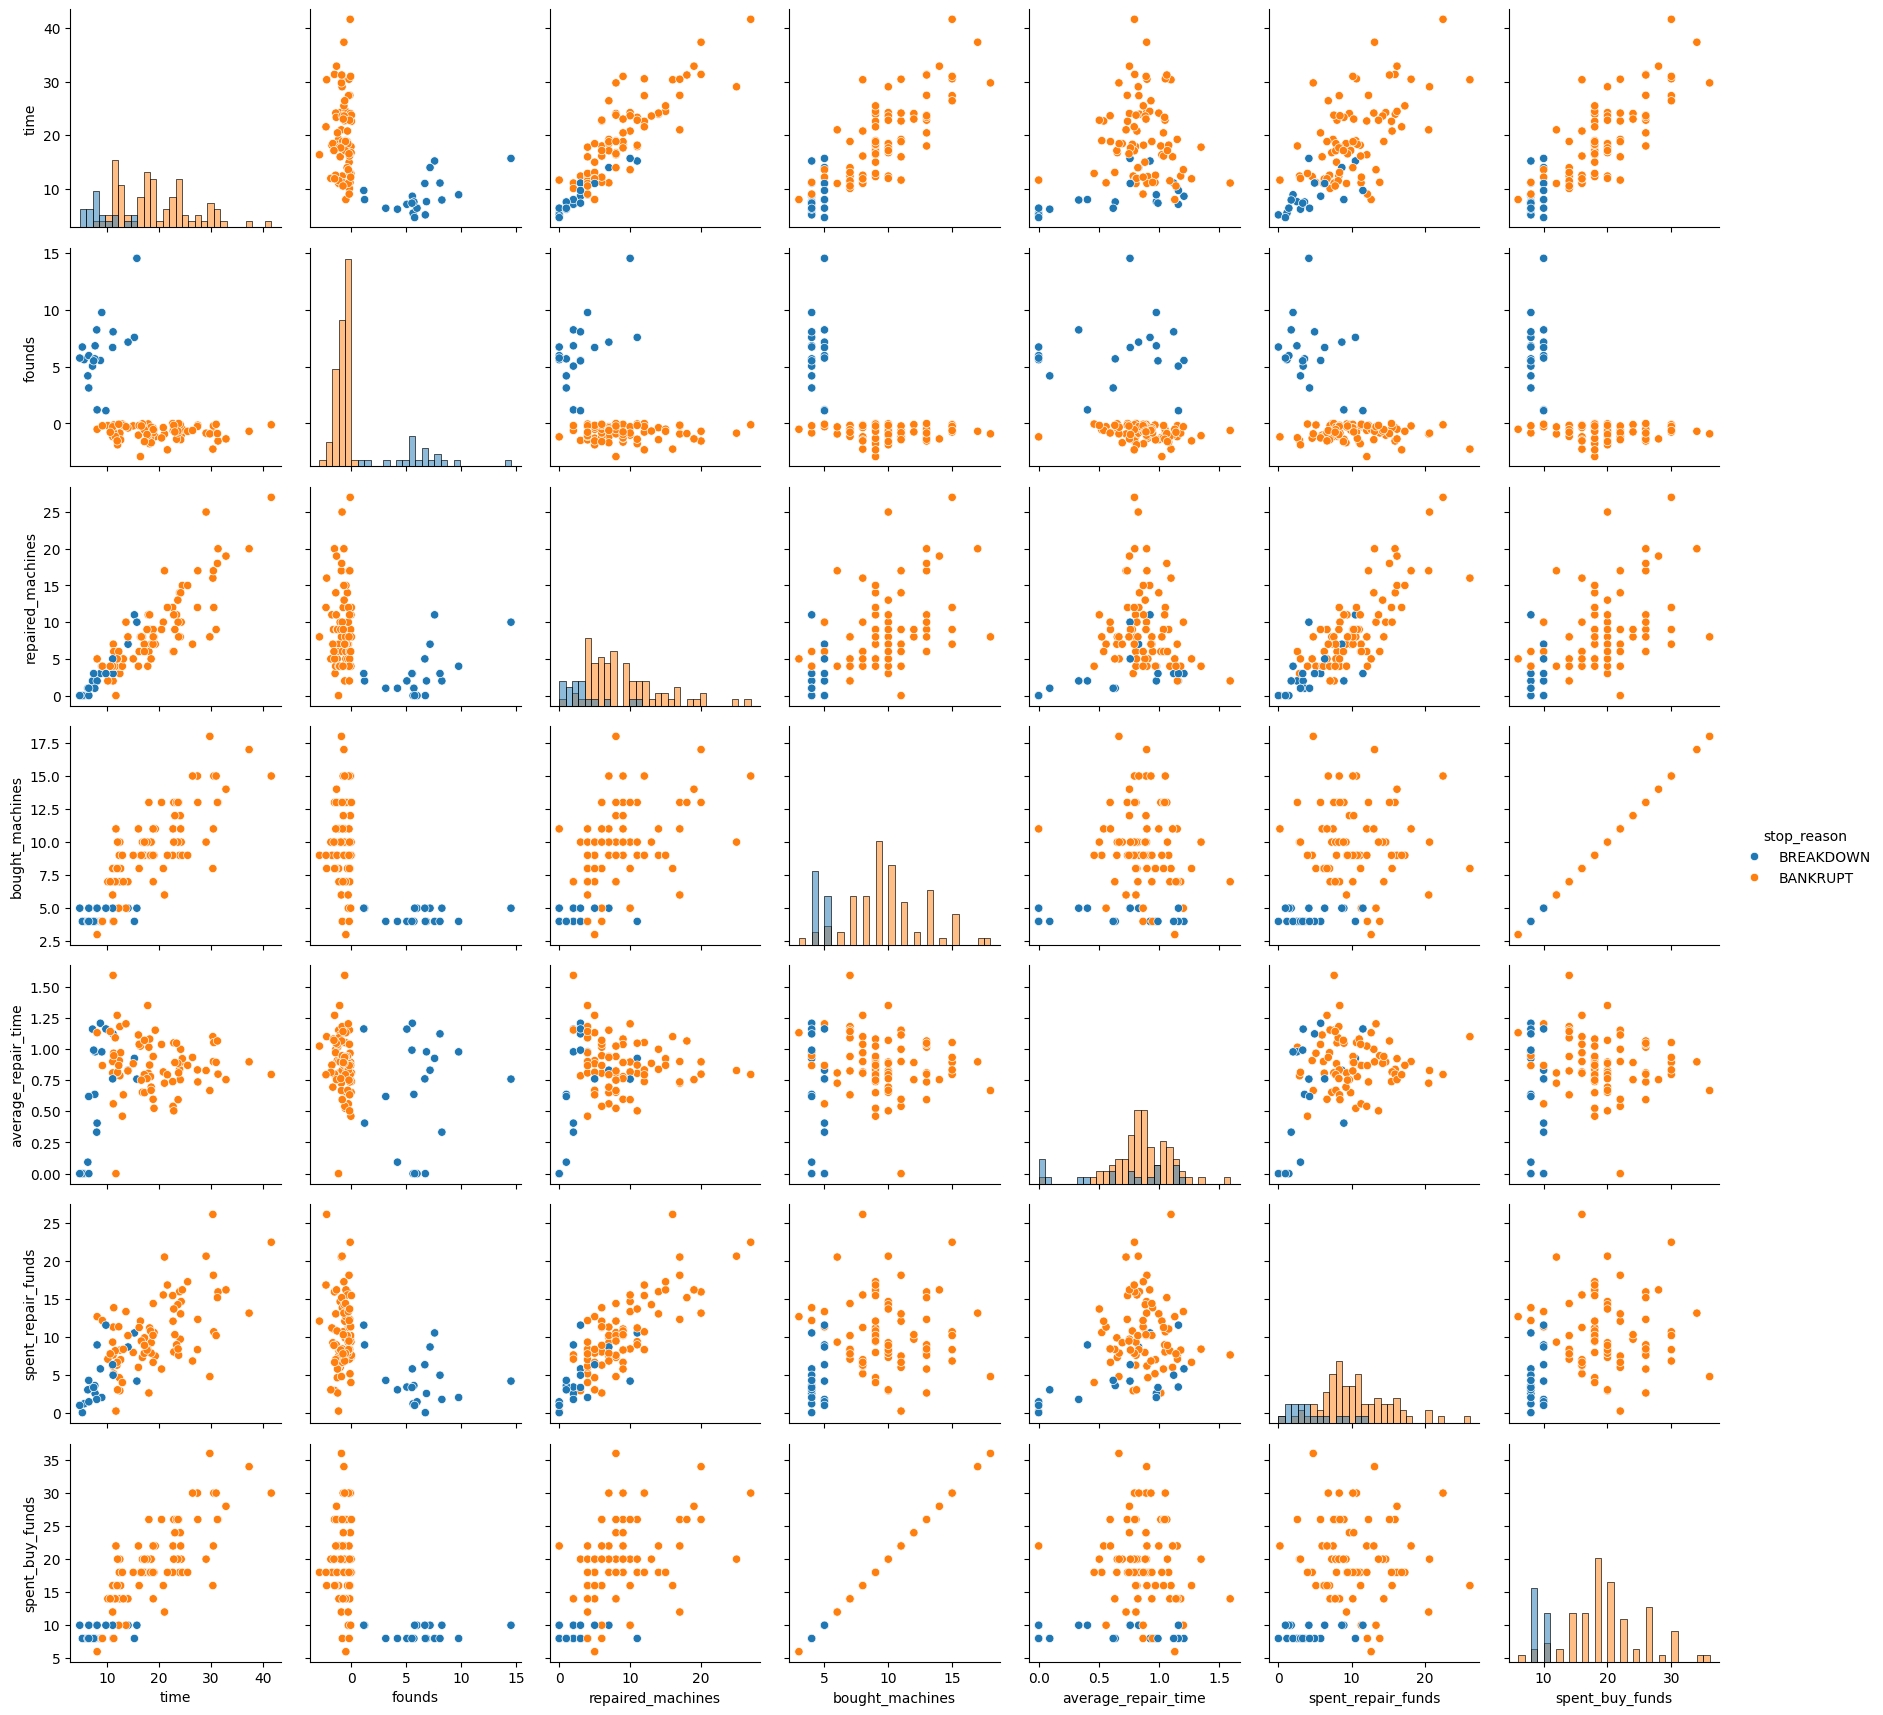

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean    17.333400    0.606756           7.770000         8.710000   
std      7.862687    3.137511           5.415755         3.429801   
min      4.634422   -2.912024           0.000000         3.000000   
25%     11.167925   -1.041252           4.000000         5.000000   
50%     16.929959   -0.509596           7.000000         9.000000   
75%     22.874884   -0.067019          10.000000        11.000000   
max     41.658984   14.515348          27.000000        18.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.828457            9.282390        17.420000  
std               0.291578            5.042202         6.859602  
min               0.000000            0.006117         6.000000  
25%               0.737096            6.107973        10.000000  
50%               0.866685            8.765775        18.000000  
75%               1.015730           12.086791        22.000000  
max               1.589256           26.125412        36.000000

In [35]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_dummy, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_1 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_1, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_1.describe()

#### 3.2 - Funcion de decision cuadratica que prioriza el tiempo

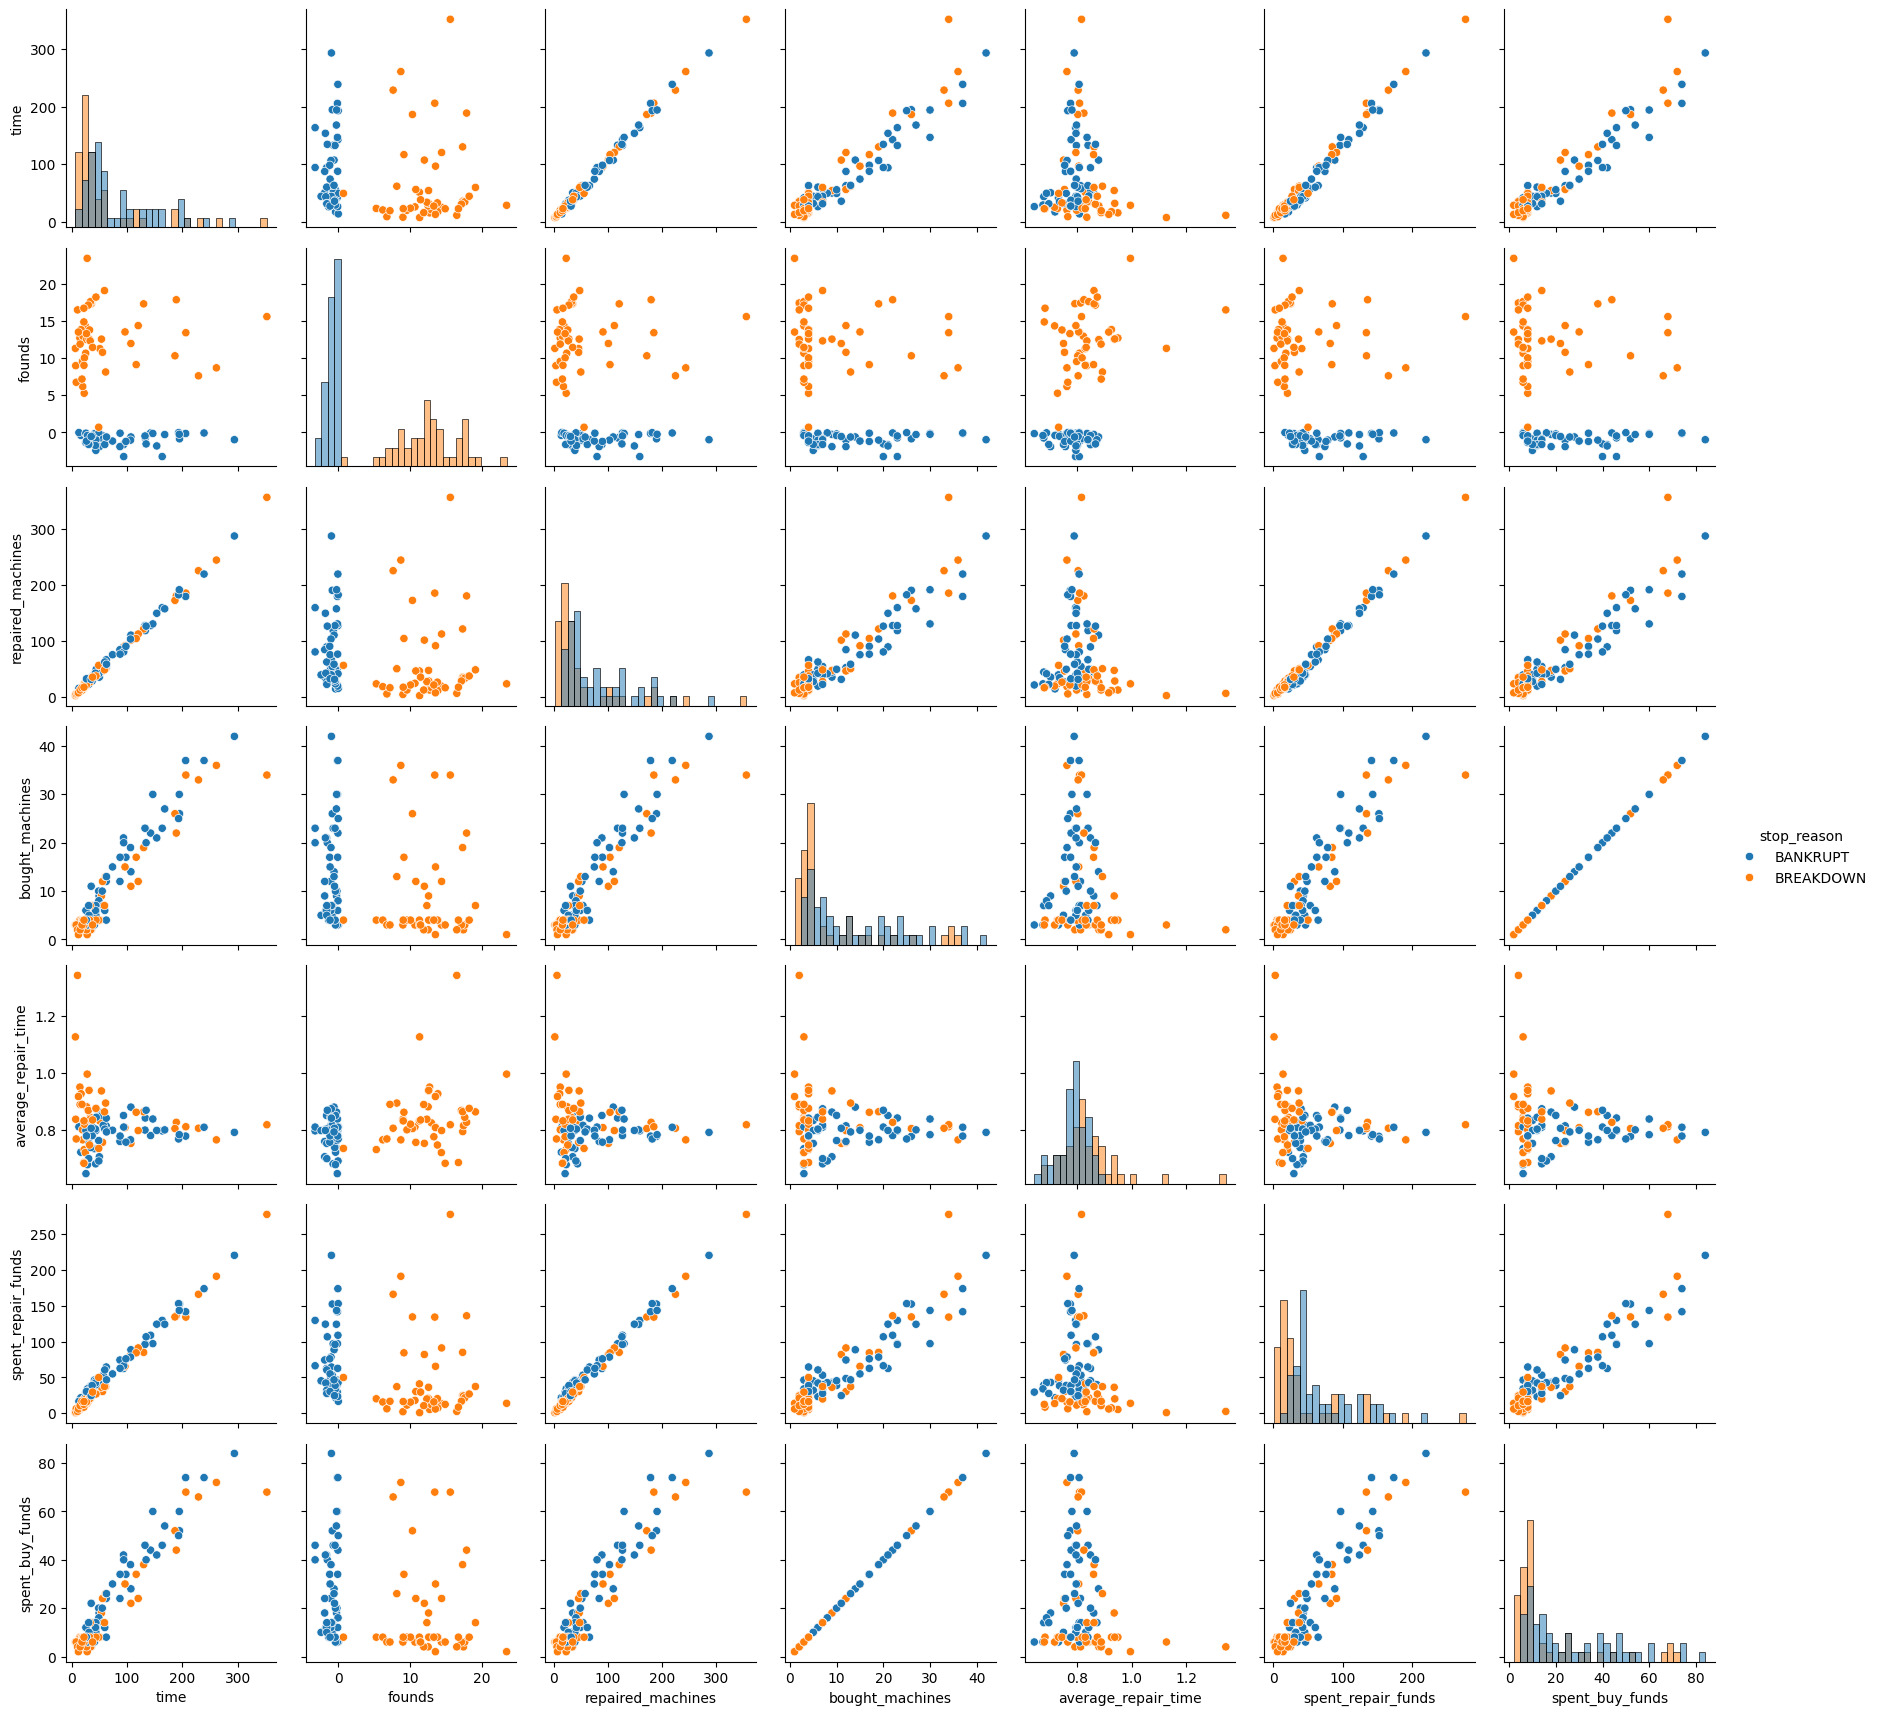

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean    75.233932    5.543457          69.650000        11.210000   
std     70.663021    7.342497          68.457223        10.206252   
min      6.911071   -3.237615           2.000000         1.000000   
25%     26.949648   -0.825919          23.000000         4.000000   
50%     44.276998   -0.036354          41.500000         7.000000   
75%    106.558752   12.495915         101.500000        17.000000   
max    352.365944   23.391838         356.000000        42.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.812966           57.237339        22.420000  
std               0.088689           52.613878        20.412504  
min               0.644559            0.804645         2.000000  
25%               0.766883           20.327436         8.000000  
50%               0.803994           39.108198        14.000000  
75%               0.841324           79.412533        34.000000  
max               1.343467          277.928771        84.000000

In [36]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_time, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_2 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_2, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_2.describe()

#### 3.3 - Funcion de decision cuadratica que prioriza el costo

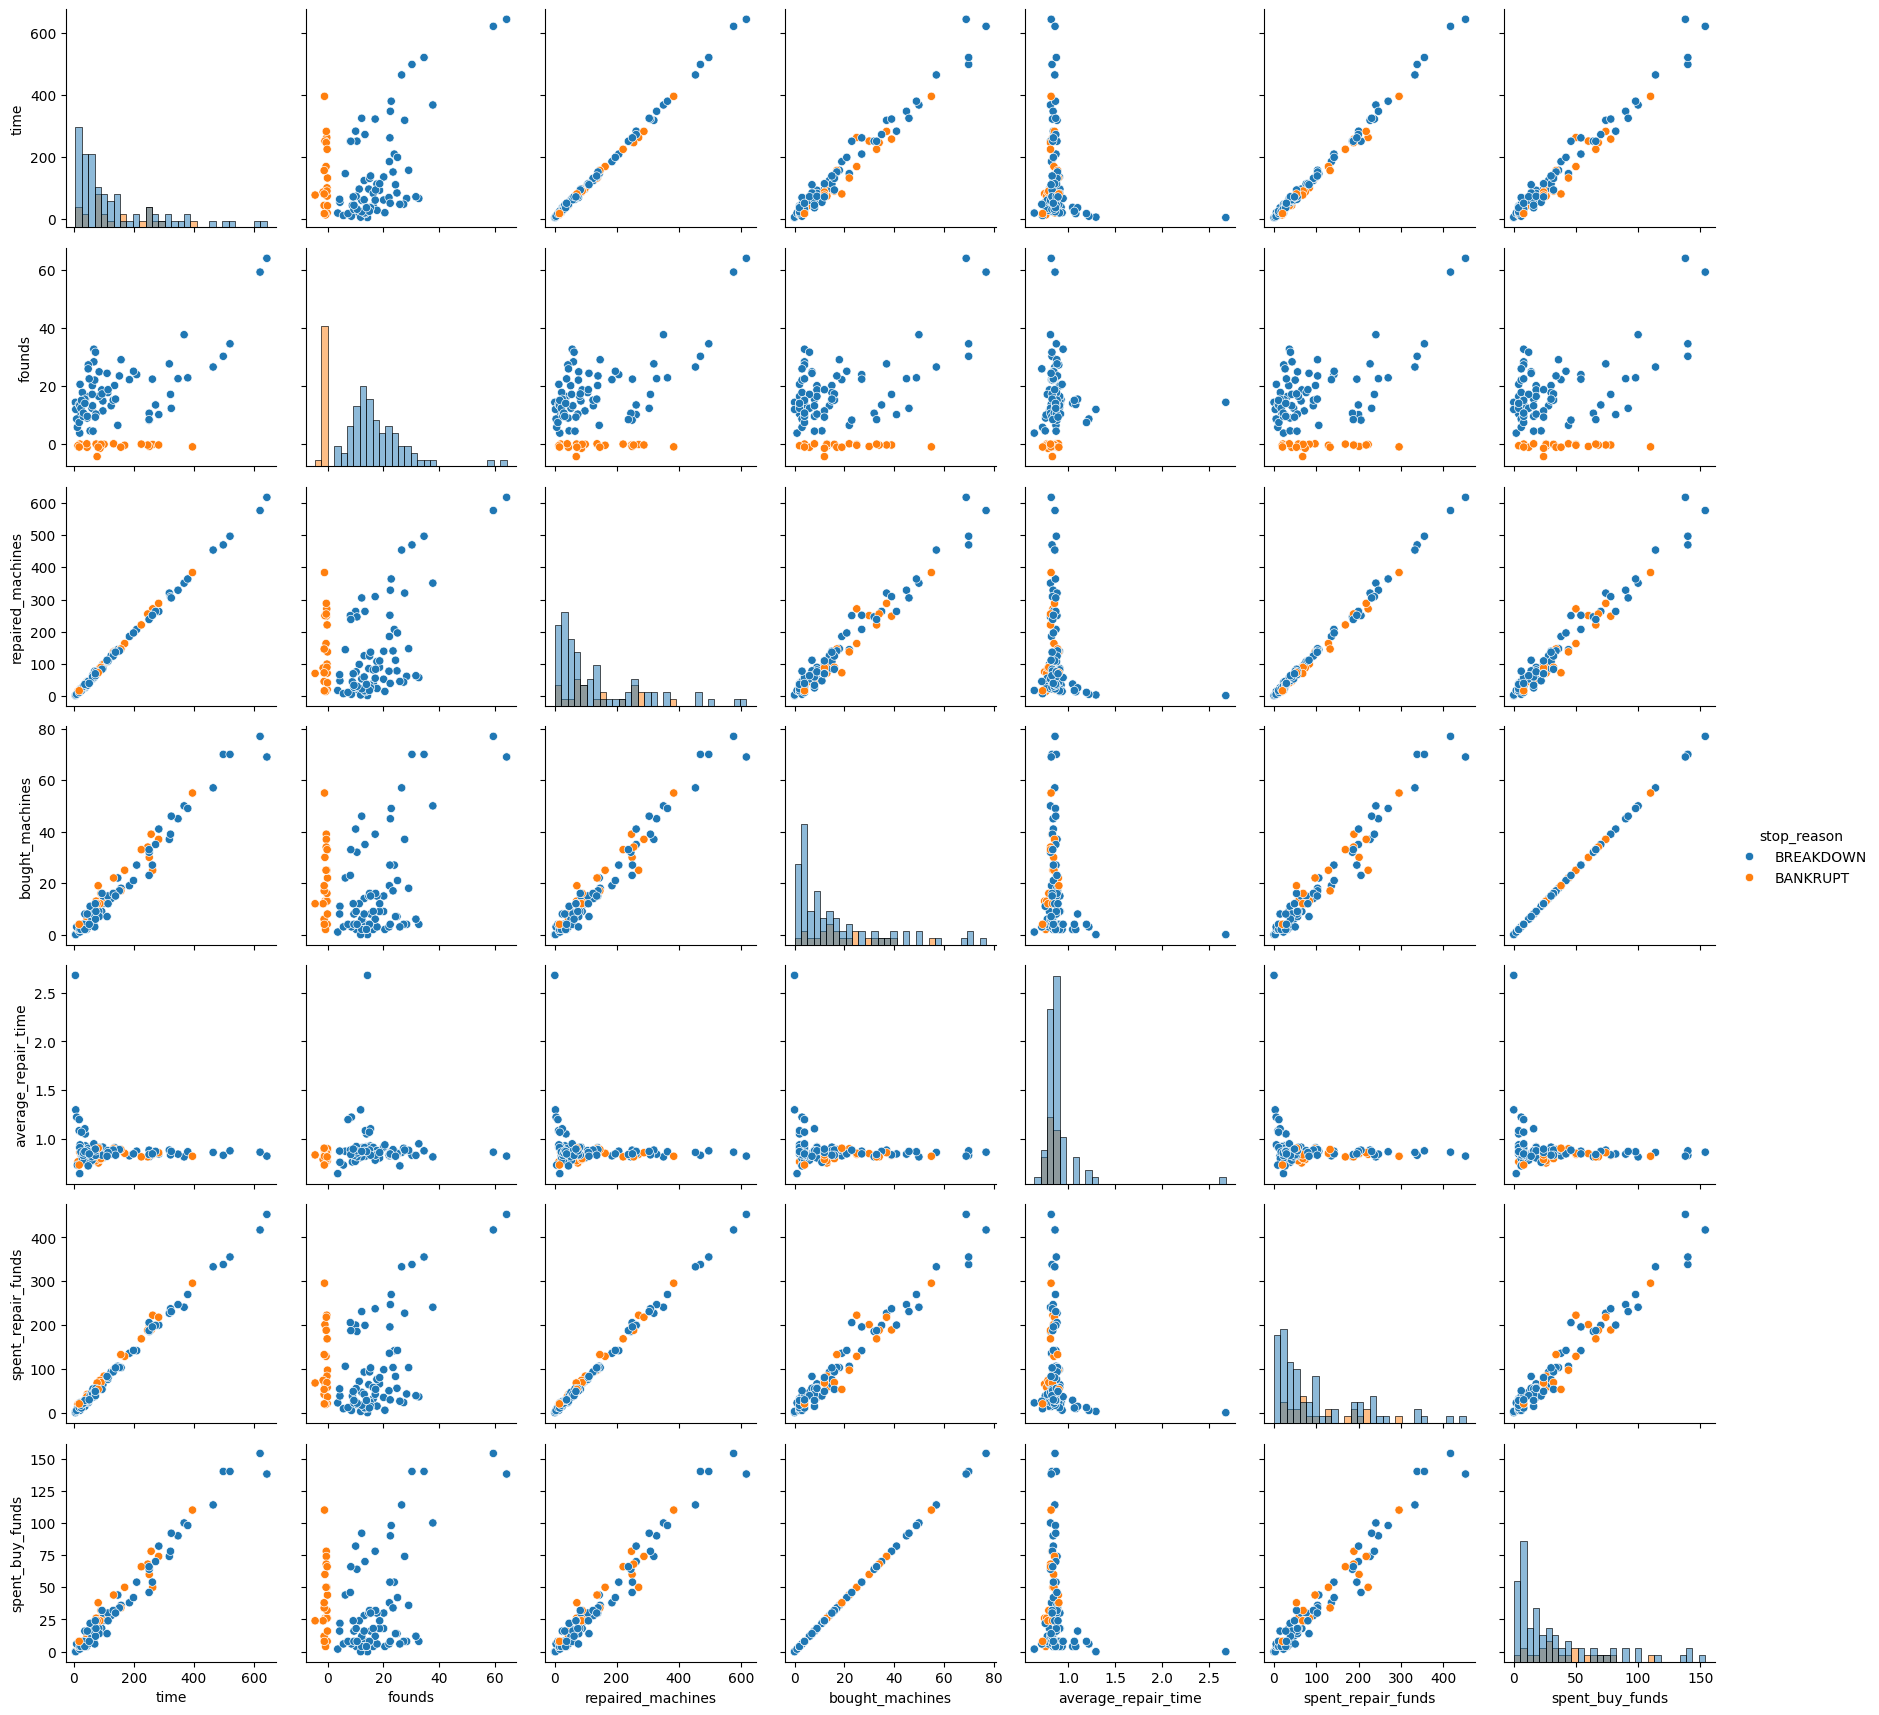

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000         100.000000       100.000000   
mean   136.746163   13.823218         131.060000        17.160000   
std    138.542309   12.049061         133.983552        17.763724   
min      4.734039   -4.454409           1.000000         0.000000   
25%     38.173761    5.372189          35.500000         4.000000   
50%     82.199182   13.342361          77.500000        12.000000   
75%    201.379728   20.242197         198.750000        23.500000   
max    643.734877   64.168281         618.000000        77.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.883257           98.672592        34.320000  
std               0.204798           98.584204        35.527448  
min               0.639960            0.380823         0.000000  
25%               0.820682           26.366046         8.000000  
50%               0.853775           57.883927        24.000000  
75%               0.883680          141.918073        47.000000  
max               2.679912          452.524376       154.000000

In [37]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_cost, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_3 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_3, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_3.describe()

#### 3.4 - Funcion de decision cuadratica que prioriza el producto del tiempo y el costo

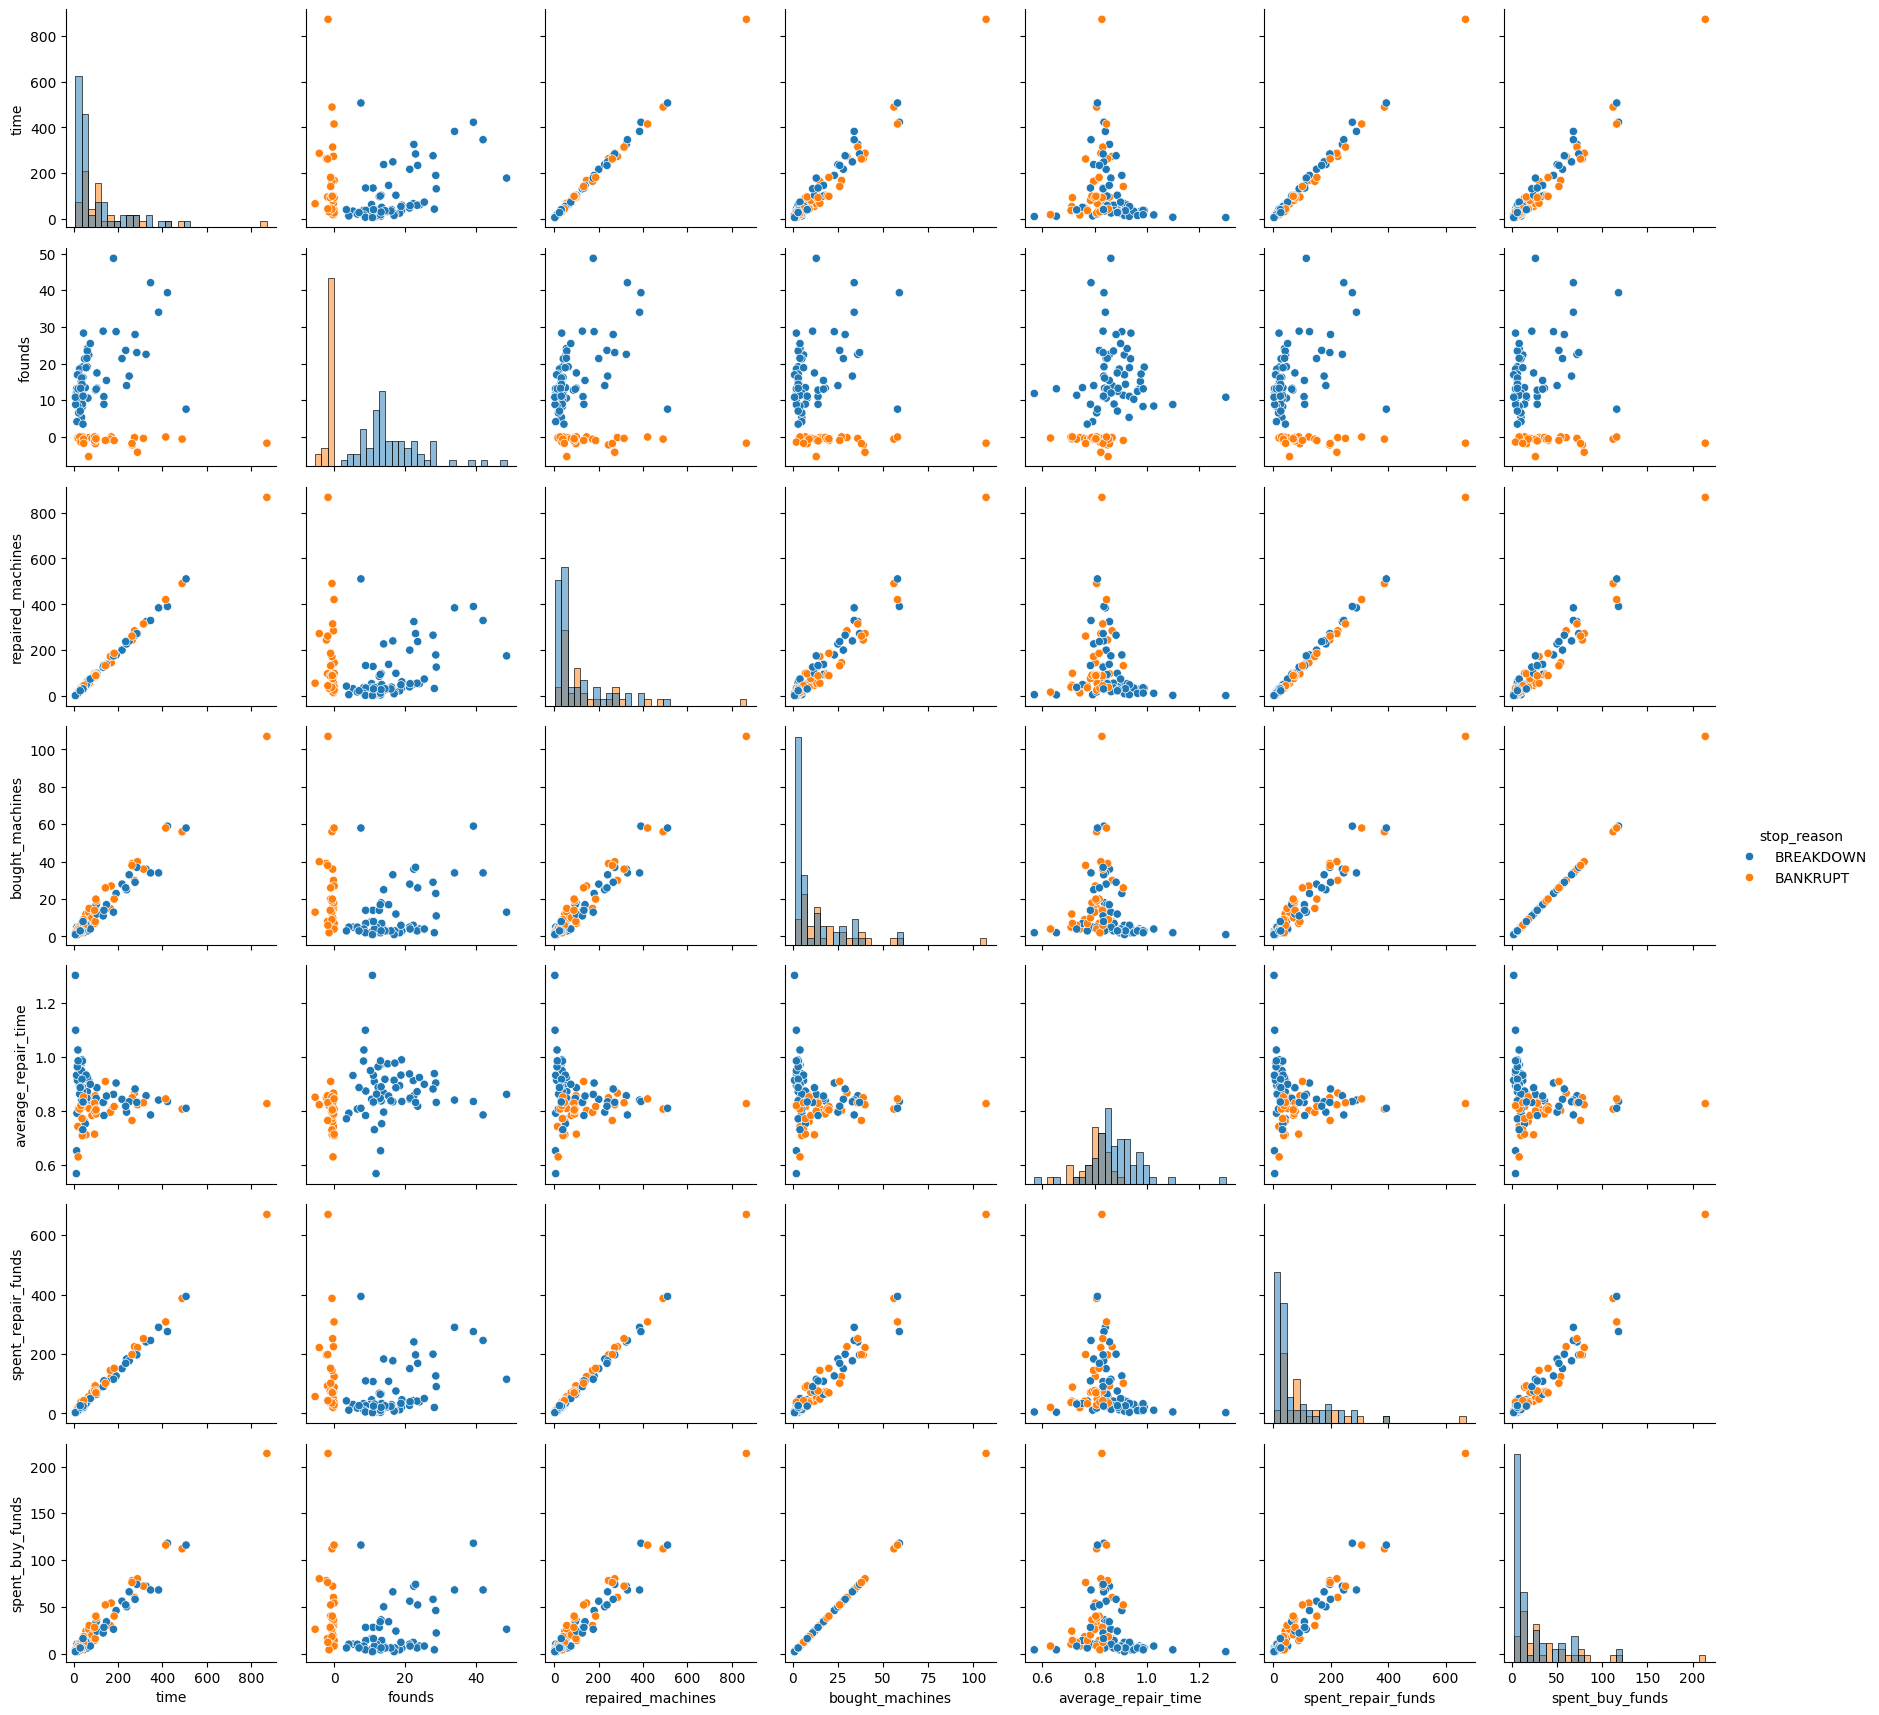

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000          100.00000       100.000000   
mean   115.426248   10.525998          111.26000        14.260000   
std    137.836585   11.077004          137.23427        16.844278   
min      6.585564   -5.419784            3.00000         1.000000   
25%     33.841242   -0.256165           32.00000         3.000000   
50%     56.876484   11.004575           52.00000         7.000000   
75%    143.453844   16.652747          135.25000        18.250000   
max    871.996888   48.735159          866.00000       107.000000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.851919           86.394530        28.520000  
std               0.093534          104.416830        33.688556  
min               0.568966            2.833449         2.000000  
25%               0.807945           24.745136         6.000000  
50%               0.842561           41.660239        14.000000  
75%               0.895775          108.733517        36.500000  
max               1.302451          669.549924       214.000000

In [38]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_all, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_4 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_4, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_4.describe()

#### 3.5 - A los datos de mejor desempeño le activamos SJF para ver si mejoran

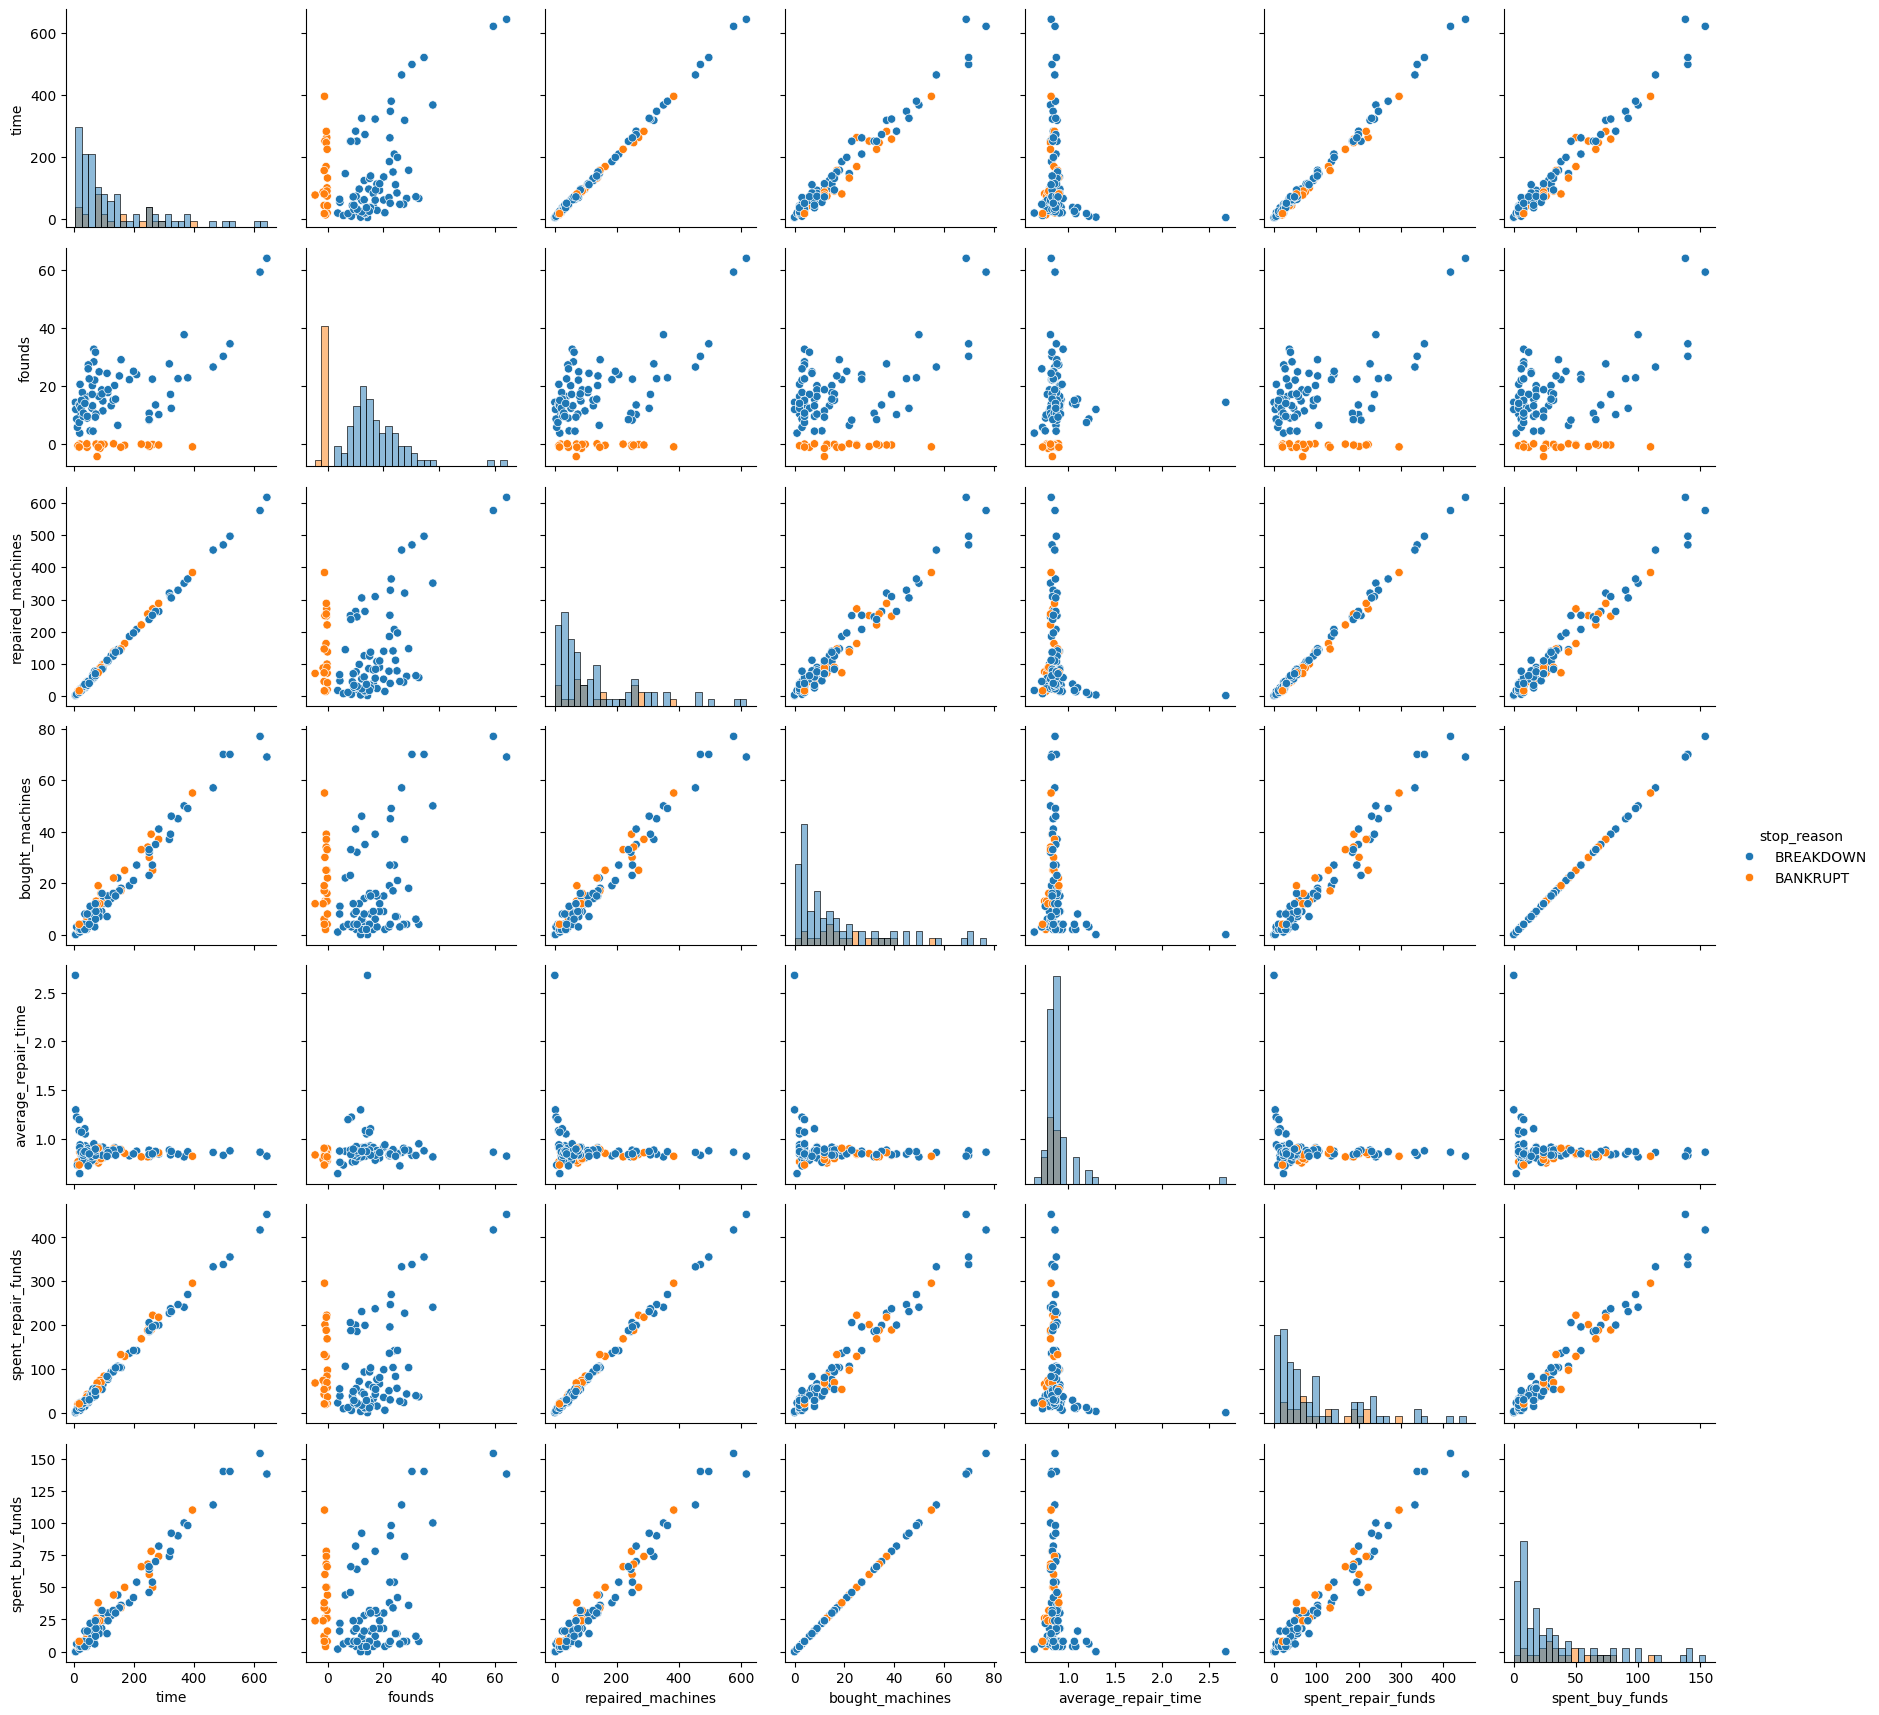

time      founds  repaired_machines  bought_machines  \
count  100.000000  100.000000          100.00000        100.00000   
mean   232.497323   11.379876          228.12000         29.80000   
std    248.476586   12.318170          246.45299         31.41961   
min      7.874856   -2.746680            2.00000          0.00000   
25%     43.946570   -0.294044           41.25000          4.75000   
50%    119.647774   10.557134          119.50000         16.00000   
75%    349.002961   17.088134          349.50000         44.00000   
max    906.249167   62.496007          893.00000        129.00000   

       average_repair_time  spent_repair_funds  spent_buy_funds  
count           100.000000          100.000000       100.000000  
mean              0.861306          171.541905        59.600000  
std               0.120215          181.341466        62.839221  
min               0.623503            1.680861         0.000000  
25%               0.825394           34.891088         9.500000  
50%               0.852149           91.687017        32.000000  
75%               0.875875          267.919541        88.000000  
max               1.860073          674.166802       258.000000

In [39]:
results = [simulate(20, # cantidad de maquinas
                    5, # cantidad de repuestos
                    10, # presupuesto inicial
                    2, # costo de compra
                    1, # tiempo de entrega
                    profit_function_sn_lg, # funcion de ganancia
                    decition_function_sq_cost, # funcion de decicion
                    event_distribution, # distribucion de las rupturas
                    repair_time_distribution, # distribucion de los tiempos de reparacion
                    repair_cost_distribution, # distribucion de los costos de reparacion
                    1000,
                    sjf=True) # cantidad maxima de pasos de la simulacion
           for _ in range(100)]

df_3_5 = pd.DataFrame(results)

plot = sns.PairGrid(df_3_3, hue='stop_reason')
plot.map_diag(sns.histplot, bins=30)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

plt.show()
df_3_5.describe()

## Pruebas de hipotesis

In [40]:
ALPHA = 0.05

In [57]:
time_2_0 = df_2_0.time.mean()
time_1_3 = df_1_3.time.mean()
time_1_2 = df_1_2.time.mean()

print(f'Tiempo promedio de 1.0: {time_2_0}')
print(f'Tiempo promedio de 1.1: {time_1_3}')
print(f'Tiempo promedio de 1.2: {time_1_2}')

timeout_rel_2_0 = sum(df_2_0.stop_reason == TIMEOUT) / len(df_2_0.stop_reason)
timeout_rel_1_3 = sum(df_1_3.stop_reason == TIMEOUT) / len(df_1_3.stop_reason)
timeout_rel_1_2 = sum(df_1_2.stop_reason == TIMEOUT) / len(df_1_2.stop_reason)

print(f'Proporcion de TIMEOUT\'s en 1.0: {timeout_rel_2_0}')
print(f'Proporcion de TIMEOUT\'s en 1.1: {timeout_rel_1_3}')
print(f'Proporcion de TIMEOUT\'s en 1.1: {timeout_rel_1_2}')

Tiempo promedio de 1.0: 330.58857274816734
Tiempo promedio de 1.1: 881.3796797689375
Tiempo promedio de 1.2: 681.468208073033
Proporcion de TIMEOUT's en 1.0: 0.08
Proporcion de TIMEOUT's en 1.1: 0.97
Proporcion de TIMEOUT's en 1.1: 0.53


In [62]:
time_1_3 = df_1_3.time.mean()
time_2_0 = df_2_0.time.mean()

print(f'Tiempo promedio de 1.3: {time_1_3}')
print(f'Tiempo promedio de 2.0: {time_2_0}')

timeout_rel_1_3 = sum(df_1_3.stop_reason == TIMEOUT) / len(df_1_3.stop_reason)
timeout_rel_2_0 = sum(df_2_0.stop_reason == TIMEOUT) / len(df_2_0.stop_reason)

print(f'Proporcion de TIMEOUT\'s en 1.3: {timeout_rel_1_3}')
print(f'Proporcion de TIMEOUT\'s en 2.0: {timeout_rel_2_0}')

t_statistic, p_value = stats.kruskal(df_1_3.time, df_2_0.time)

if p_value < ALPHA:
    print("Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media")
else:
    print("Aceptamos la hipotesis nula, luego, los datos tienen la misma mediana")

p_value

Tiempo promedio de 1.3: 340.46121639207956
Tiempo promedio de 2.0: 233.87795093936336
Proporcion de TIMEOUT's en 1.3: 0.1
Proporcion de TIMEOUT's en 2.0: 0.04
Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media


0.0029904538555119717

In [63]:
founds_1_3 = df_1_3.founds.mean()
founds_2_0 = df_2_0.founds.mean()

print(f'Fondos promedio de 1.3: {founds_1_3}')
print(f'Fondos promedio de 2.0: {founds_2_0}')

t_statistic, p_value = stats.kruskal(df_1_3.founds, df_2_0.founds)

if p_value < ALPHA:
    print("Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media")
else:
    print("Aceptamos la hipotesis nula, luego, los datos tienen la misma mediana")

p_value

Fondos promedio de 1.3: 3038.7655064046708
Fondos promedio de 2.0: 2113.0399565377456
Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media


0.0038759429736293224

In [41]:
t_statistic, p_value = stats.ttest_ind(df_2_0.time, df_1_3.time)

if p_value < ALPHA:
    print("Ambos tiempos tienen distintas medias")
else:
    print("Ambos tiempos tienen la misma media")

Ambos tiempos tienen distintas medias


In [42]:
t_statistic, p_value = stats.ttest_ind(df_2_0.time, df_1_2.time)

if p_value < ALPHA:
    print("Ambos tiempos tienen distintas medias")
else:
    print("Ambos tiempos tienen la misma media")

Ambos tiempos tienen distintas medias


In [43]:
t_statistic, p_value = stats.ttest_ind(df_1_3.time, df_2_0.time)

if p_value < ALPHA:
    print("Ambos tiempos tienen distintas medias")
else:
    print("Ambos tiempos tienen la misma media")

Ambos tiempos tienen distintas medias


In [44]:
t_statistic, p_value = stats.ttest_ind(df_3_5.founds, df_3_0.founds)

if p_value < ALPHA:
    print("Ambos tiempos tienen distintas medias")
else:
    print("Ambos tiempos tienen la misma media")

Ambos tiempos tienen distintas medias


In [45]:
t_statistic, p_value = stats.kruskal(df_3_2.time, df_3_3.time, df_3_4.time)

if p_value < ALPHA:
    print("Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media")
else:
    print("Aceptamos la hipotesis nula, luego, los datos tienen la misma mediana")

Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media


In [46]:
t_statistic, p_value = stats.kruskal(df_3_2.founds, df_3_3.founds, df_3_4.founds)

if p_value < ALPHA:
    print("Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media")
else:
    print("Aceptamos la hipotesis nula, luego, los datos tienen la misma mediana")

Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media


In [47]:
opt_time = df_3_2.founds.mean()
opt_cost = df_3_3.founds.mean() # la estrategia de escoger priorizando el precio optimiza la media de las ganancias
opt_all = df_3_4.founds.mean()
opt_linl = df_2_1.founds.mean()

print(opt_time, opt_cost, opt_all, opt_linl)

5.543456665991581 13.82321779297322 10.525997632611357 7.630557128629728


In [48]:
opt_time = df_3_2.time.mean()
opt_cost = df_3_3.time.mean() # la estrategia de escoger priorizando el precio tambien optimiza la media del tiempo
opt_all = df_3_4.time.mean()
opt_linl = df_2_1.time.mean()

print(opt_time, opt_cost, opt_all, opt_linl)

75.23393178468777 136.74616269182246 115.42624813233087 115.60633041010487


In [50]:
print(f'Fondos en 3.3: {df_3_3.founds.mean():.4f} Fondos en 3.5: {df_3_5.founds.mean():.4f}')
print(f'Tiempo en 3.3: {df_3_3.time.mean():.4f} Time en 3.5: {df_3_5.time.mean():.4f}')



Costo en 3.3: 13.8232 Costo en 3.5: 11.3799
Tiempo en 3.3: 136.7462 Time en 3.5: 232.4973


In [51]:
t_statistic, p_value = stats.kruskal(df_3_3.founds, df_3_5.founds)

if p_value < ALPHA:
    print("Rechazamos la hipotesis nula, luego, no todos los datos tienen la misma media")
else:
    print("Aceptamos la hipotesis nula, luego, los datos tienen la misma mediana")

Aceptamos la hipotesis nula, luego, los datos tienen la misma mediana
